In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from torchvision import transforms
from torch.utils.data import random_split
import numpy as np
from PIL import Image
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import torchvision.transforms as tfms

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from dataset_custom_seg import CustomDataset
from torchvision import transforms
paths_train = []
paths_valid = []
train_valid_split = 0.85

device = 'mps' #for my macbook
# Define transforms
transform = tfms.Compose([
            tfms.ToPILImage(),
            tfms.Resize((256, 256),antialias=True),
            tfms.ToTensor(),  # Converts to float and normalizes to [0, 1]
        ])

# Define the dataset
dataset1 = CustomDataset('Segmentation_data/phase_map_fig3s', 'Segmentation_data/phase_map_fig1s', transform=transform)
dataset2 = CustomDataset('Segmentation_data/another_500/phase_map_fig3s_another_500', 'Segmentation_data/another_500/phase_map_fig1s_another_500', transform=transform)
dataset = ConcatDataset([dataset1, dataset2])

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=6, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=6, shuffle=False)

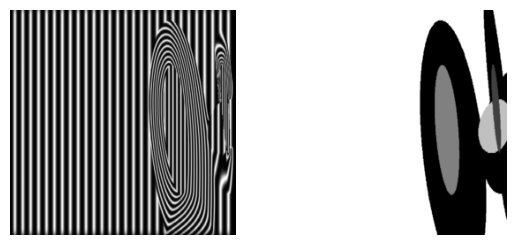

In [4]:
""" 
plot the first image with its target image in the dataset side by side
"""
fig, ax = plt.subplots(1, 2)
ax[0].imshow(train_dataset[1][0].squeeze(), cmap='gray')
ax[0].axis('off')
ax[1].imshow(train_dataset[1][1].squeeze(), cmap='gray')
ax[1].axis('off')
plt.show()


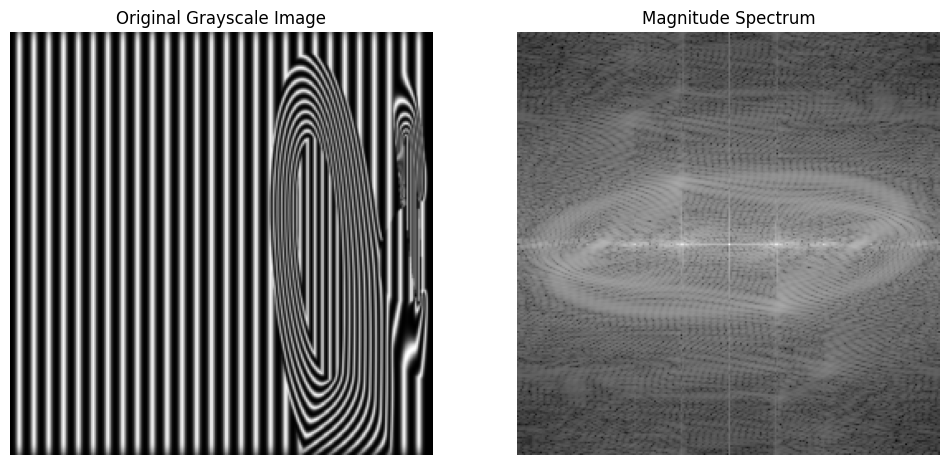

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Load the first image in the training dataset
image_array = train_dataset[1][0].squeeze()*255.0

# Step 2: Apply the 2D Fourier Transform
f_transform = np.fft.fft2(image_array)

# Step 3: Shift the zero frequency component to the center
f_transform_shifted = np.fft.fftshift(f_transform)

# Step 4: Compute the magnitude spectrum (for visualization)
magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)

# Plot the original image and its magnitude spectrum
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(image_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Magnitude Spectrum')
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

plt.show()

In [6]:
from model_segmentation import UNet
device = torch.device('mps')
net = UNet().to(device)

In [7]:
from train_loss_seg import train_model

In [8]:

image_test= train_dataset[0][0].unsqueeze(0)
image_test = image_test.to(device)
output = net(image_test)
print(output.shape)


torch.Size([1, 1, 256, 256])


In [9]:
train_loss, valid_loss = train_model(net, train_loader, val_loader, num_epochs=3, learning_rate=1e-3, alpha=1.0)

Training Epoch 1:   1%|          | 1/134 [00:01<03:11,  1.44s/it]

Train Epoch: 1 [0/800 (0%)]	Loss: 1.082329


Training Epoch 1:   8%|▊         | 11/134 [00:13<02:23,  1.17s/it]

Train Epoch: 1 [60/800 (7%)]	Loss: 0.132795


Training Epoch 1:  16%|█▌        | 21/134 [00:24<02:11,  1.16s/it]

Train Epoch: 1 [120/800 (15%)]	Loss: 0.112533


Training Epoch 1:  23%|██▎       | 31/134 [00:36<02:02,  1.19s/it]

Train Epoch: 1 [180/800 (22%)]	Loss: 0.064711


Training Epoch 1:  31%|███       | 41/134 [00:48<01:50,  1.19s/it]

Train Epoch: 1 [240/800 (30%)]	Loss: 0.055745


Training Epoch 1:  38%|███▊      | 51/134 [01:00<01:38,  1.19s/it]

Train Epoch: 1 [300/800 (37%)]	Loss: 0.040099


Training Epoch 1:  46%|████▌     | 61/134 [01:12<01:27,  1.19s/it]

Train Epoch: 1 [360/800 (45%)]	Loss: 0.055314


Training Epoch 1:  53%|█████▎    | 71/134 [01:24<01:14,  1.19s/it]

Train Epoch: 1 [420/800 (52%)]	Loss: 0.044030


Training Epoch 1:  60%|██████    | 81/134 [01:36<01:03,  1.19s/it]

Train Epoch: 1 [480/800 (60%)]	Loss: 0.029039


Training Epoch 1:  68%|██████▊   | 91/134 [01:47<00:50,  1.18s/it]

Train Epoch: 1 [540/800 (67%)]	Loss: 0.033229


Training Epoch 1:  75%|███████▌  | 101/134 [01:59<00:38,  1.18s/it]

Train Epoch: 1 [600/800 (75%)]	Loss: 0.048581


Training Epoch 1:  83%|████████▎ | 111/134 [02:11<00:26,  1.17s/it]

Train Epoch: 1 [660/800 (82%)]	Loss: 0.032187


Training Epoch 1:  90%|█████████ | 121/134 [02:23<00:15,  1.21s/it]

Train Epoch: 1 [720/800 (90%)]	Loss: 0.048244


Training Epoch 1:  98%|█████████▊| 131/134 [02:35<00:03,  1.23s/it]

Train Epoch: 1 [780/800 (97%)]	Loss: 0.026069


Training Epoch 1: 100%|██████████| 134/134 [02:39<00:00,  1.19s/it]


Epoch 1 Training Loss: 0.084345


Validation Epoch 1: 100%|██████████| 34/34 [00:18<00:00,  1.87it/s]


Epoch 1 Validation Loss: 0.035632
Model saved with validation loss: 0.035632


Training Epoch 2:   1%|          | 1/134 [00:01<02:41,  1.21s/it]

Train Epoch: 2 [0/800 (0%)]	Loss: 0.033832


Training Epoch 2:   8%|▊         | 11/134 [00:13<02:34,  1.26s/it]

Train Epoch: 2 [60/800 (7%)]	Loss: 0.033389


Training Epoch 2:  16%|█▌        | 21/134 [00:26<02:24,  1.27s/it]

Train Epoch: 2 [120/800 (15%)]	Loss: 0.024514


Training Epoch 2:  23%|██▎       | 31/134 [00:39<02:13,  1.29s/it]

Train Epoch: 2 [180/800 (22%)]	Loss: 0.024437


Training Epoch 2:  31%|███       | 41/134 [00:52<01:59,  1.28s/it]

Train Epoch: 2 [240/800 (30%)]	Loss: 0.024831


Training Epoch 2:  38%|███▊      | 51/134 [01:05<01:47,  1.30s/it]

Train Epoch: 2 [300/800 (37%)]	Loss: 0.031854


Training Epoch 2:  46%|████▌     | 61/134 [01:18<01:34,  1.30s/it]

Train Epoch: 2 [360/800 (45%)]	Loss: 0.024345


Training Epoch 2:  53%|█████▎    | 71/134 [01:31<01:21,  1.30s/it]

Train Epoch: 2 [420/800 (52%)]	Loss: 0.022140


Training Epoch 2:  60%|██████    | 81/134 [01:44<01:10,  1.33s/it]

Train Epoch: 2 [480/800 (60%)]	Loss: 0.019054


Training Epoch 2:  68%|██████▊   | 91/134 [01:57<00:56,  1.31s/it]

Train Epoch: 2 [540/800 (67%)]	Loss: 0.026644


Training Epoch 2:  75%|███████▌  | 101/134 [02:11<00:43,  1.32s/it]

Train Epoch: 2 [600/800 (75%)]	Loss: 0.019980


Training Epoch 2:  83%|████████▎ | 111/134 [02:24<00:30,  1.31s/it]

Train Epoch: 2 [660/800 (82%)]	Loss: 0.024247


Training Epoch 2:  90%|█████████ | 121/134 [02:37<00:17,  1.31s/it]

Train Epoch: 2 [720/800 (90%)]	Loss: 0.022786


Training Epoch 2:  98%|█████████▊| 131/134 [02:50<00:04,  1.35s/it]

Train Epoch: 2 [780/800 (97%)]	Loss: 0.019571


Training Epoch 2: 100%|██████████| 134/134 [02:54<00:00,  1.30s/it]


Epoch 2 Training Loss: 0.025383


Validation Epoch 2: 100%|██████████| 34/34 [00:19<00:00,  1.74it/s]


Epoch 2 Validation Loss: 0.020375
Model saved with validation loss: 0.020375


Training Epoch 3:   1%|          | 1/134 [00:01<02:42,  1.22s/it]

Train Epoch: 3 [0/800 (0%)]	Loss: 0.016878


Training Epoch 3:   8%|▊         | 11/134 [00:14<02:40,  1.30s/it]

Train Epoch: 3 [60/800 (7%)]	Loss: 0.019410


Training Epoch 3:  16%|█▌        | 21/134 [00:27<02:26,  1.29s/it]

Train Epoch: 3 [120/800 (15%)]	Loss: 0.018165


Training Epoch 3:  23%|██▎       | 31/134 [00:40<02:13,  1.30s/it]

Train Epoch: 3 [180/800 (22%)]	Loss: 0.021727


Training Epoch 3:  31%|███       | 41/134 [00:53<02:04,  1.34s/it]

Train Epoch: 3 [240/800 (30%)]	Loss: 0.013687


Training Epoch 3:  38%|███▊      | 51/134 [01:06<01:46,  1.29s/it]

Train Epoch: 3 [300/800 (37%)]	Loss: 0.018560


Training Epoch 3:  46%|████▌     | 61/134 [01:19<01:34,  1.30s/it]

Train Epoch: 3 [360/800 (45%)]	Loss: 0.019943


Training Epoch 3:  53%|█████▎    | 71/134 [01:32<01:20,  1.28s/it]

Train Epoch: 3 [420/800 (52%)]	Loss: 0.022976


Training Epoch 3:  60%|██████    | 81/134 [01:44<01:07,  1.27s/it]

Train Epoch: 3 [480/800 (60%)]	Loss: 0.015077


Training Epoch 3:  68%|██████▊   | 91/134 [01:57<00:55,  1.28s/it]

Train Epoch: 3 [540/800 (67%)]	Loss: 0.016331


Training Epoch 3:  75%|███████▌  | 101/134 [02:10<00:41,  1.27s/it]

Train Epoch: 3 [600/800 (75%)]	Loss: 0.016688


Training Epoch 3:  83%|████████▎ | 111/134 [02:23<00:29,  1.27s/it]

Train Epoch: 3 [660/800 (82%)]	Loss: 0.013293


Training Epoch 3:  90%|█████████ | 121/134 [02:35<00:16,  1.27s/it]

Train Epoch: 3 [720/800 (90%)]	Loss: 0.014495


Training Epoch 3:  98%|█████████▊| 131/134 [02:48<00:03,  1.28s/it]

Train Epoch: 3 [780/800 (97%)]	Loss: 0.012402


Training Epoch 3: 100%|██████████| 134/134 [02:51<00:00,  1.28s/it]


Epoch 3 Training Loss: 0.018405


Validation Epoch 3: 100%|██████████| 34/34 [00:18<00:00,  1.82it/s]


Epoch 3 Validation Loss: 0.016037
Model saved with validation loss: 0.016037


In [10]:
# train_loss, valid_loss = train_model(net, train_loader, val_loader, num_epochs=3, learning_rate=1e-3, alpha=0.1)

# loss function alpha changed, expect a sudden change in loss

In [11]:
train_loss, valid_loss = train_model(net, train_loader, val_loader, num_epochs=5, learning_rate=1e-3, alpha=0.0)

Training Epoch 1:   0%|          | 0/134 [00:00<?, ?it/s]

Training Epoch 1:   1%|          | 1/134 [00:01<02:41,  1.22s/it]

Train Epoch: 1 [0/800 (0%)]	Loss: 0.011864


Training Epoch 1:   8%|▊         | 11/134 [00:13<02:33,  1.25s/it]

Train Epoch: 1 [60/800 (7%)]	Loss: 0.051232


Training Epoch 1:  16%|█▌        | 21/134 [00:27<02:27,  1.31s/it]

Train Epoch: 1 [120/800 (15%)]	Loss: 0.023678


Training Epoch 1:  23%|██▎       | 31/134 [00:39<02:14,  1.30s/it]

Train Epoch: 1 [180/800 (22%)]	Loss: 0.019927


Training Epoch 1:  31%|███       | 41/134 [00:52<01:57,  1.26s/it]

Train Epoch: 1 [240/800 (30%)]	Loss: 0.015682


Training Epoch 1:  38%|███▊      | 51/134 [01:05<01:44,  1.25s/it]

Train Epoch: 1 [300/800 (37%)]	Loss: 0.015947


Training Epoch 1:  46%|████▌     | 61/134 [01:17<01:31,  1.25s/it]

Train Epoch: 1 [360/800 (45%)]	Loss: 0.016134


Training Epoch 1:  53%|█████▎    | 71/134 [01:30<01:18,  1.25s/it]

Train Epoch: 1 [420/800 (52%)]	Loss: 0.009732


Training Epoch 1:  60%|██████    | 81/134 [01:42<01:06,  1.25s/it]

Train Epoch: 1 [480/800 (60%)]	Loss: 0.013989


Training Epoch 1:  68%|██████▊   | 91/134 [01:55<00:53,  1.24s/it]

Train Epoch: 1 [540/800 (67%)]	Loss: 0.022830


Training Epoch 1:  75%|███████▌  | 101/134 [02:07<00:41,  1.25s/it]

Train Epoch: 1 [600/800 (75%)]	Loss: 0.010893


Training Epoch 1:  83%|████████▎ | 111/134 [02:19<00:28,  1.25s/it]

Train Epoch: 1 [660/800 (82%)]	Loss: 0.015614


Training Epoch 1:  90%|█████████ | 121/134 [02:32<00:16,  1.30s/it]

Train Epoch: 1 [720/800 (90%)]	Loss: 0.018558


Training Epoch 1:  98%|█████████▊| 131/134 [02:45<00:03,  1.25s/it]

Train Epoch: 1 [780/800 (97%)]	Loss: 0.028154


Training Epoch 1: 100%|██████████| 134/134 [02:48<00:00,  1.26s/it]


Epoch 1 Training Loss: 0.021484


Validation Epoch 1: 100%|██████████| 34/34 [00:18<00:00,  1.85it/s]


Epoch 1 Validation Loss: 0.010588
Model saved with validation loss: 0.010588


Training Epoch 2:   1%|          | 1/134 [00:01<02:47,  1.26s/it]

Train Epoch: 2 [0/800 (0%)]	Loss: 0.012566


Training Epoch 2:   8%|▊         | 11/134 [00:13<02:32,  1.24s/it]

Train Epoch: 2 [60/800 (7%)]	Loss: 0.012310


Training Epoch 2:  16%|█▌        | 21/134 [00:26<02:19,  1.24s/it]

Train Epoch: 2 [120/800 (15%)]	Loss: 0.011225


Training Epoch 2:  23%|██▎       | 31/134 [00:38<02:06,  1.23s/it]

Train Epoch: 2 [180/800 (22%)]	Loss: 0.008356


Training Epoch 2:  31%|███       | 41/134 [00:50<01:54,  1.23s/it]

Train Epoch: 2 [240/800 (30%)]	Loss: 0.012919


Training Epoch 2:  38%|███▊      | 51/134 [01:03<01:42,  1.24s/it]

Train Epoch: 2 [300/800 (37%)]	Loss: 0.010626


Training Epoch 2:  46%|████▌     | 61/134 [01:15<01:29,  1.23s/it]

Train Epoch: 2 [360/800 (45%)]	Loss: 0.011017


Training Epoch 2:  53%|█████▎    | 71/134 [01:27<01:17,  1.23s/it]

Train Epoch: 2 [420/800 (52%)]	Loss: 0.006109


Training Epoch 2:  60%|██████    | 81/134 [01:40<01:06,  1.25s/it]

Train Epoch: 2 [480/800 (60%)]	Loss: 0.009848


Training Epoch 2:  68%|██████▊   | 91/134 [01:52<00:53,  1.24s/it]

Train Epoch: 2 [540/800 (67%)]	Loss: 0.007778


Training Epoch 2:  75%|███████▌  | 101/134 [02:05<00:40,  1.24s/it]

Train Epoch: 2 [600/800 (75%)]	Loss: 0.008707


Training Epoch 2:  83%|████████▎ | 111/134 [02:17<00:28,  1.24s/it]

Train Epoch: 2 [660/800 (82%)]	Loss: 0.026849


Training Epoch 2:  90%|█████████ | 121/134 [02:29<00:15,  1.23s/it]

Train Epoch: 2 [720/800 (90%)]	Loss: 0.022154


Training Epoch 2:  98%|█████████▊| 131/134 [02:42<00:03,  1.23s/it]

Train Epoch: 2 [780/800 (97%)]	Loss: 0.018545


Training Epoch 2: 100%|██████████| 134/134 [02:45<00:00,  1.23s/it]


Epoch 2 Training Loss: 0.013791


Validation Epoch 2: 100%|██████████| 34/34 [00:18<00:00,  1.87it/s]


Epoch 2 Validation Loss: 0.024522


Training Epoch 3:   1%|          | 1/134 [00:01<02:43,  1.23s/it]

Train Epoch: 3 [0/800 (0%)]	Loss: 0.024629


Training Epoch 3:   8%|▊         | 11/134 [00:13<02:30,  1.22s/it]

Train Epoch: 3 [60/800 (7%)]	Loss: 0.022264


Training Epoch 3:  16%|█▌        | 21/134 [00:25<02:18,  1.23s/it]

Train Epoch: 3 [120/800 (15%)]	Loss: 0.013412


Training Epoch 3:  23%|██▎       | 31/134 [00:38<02:07,  1.24s/it]

Train Epoch: 3 [180/800 (22%)]	Loss: 0.017829


Training Epoch 3:  31%|███       | 41/134 [00:50<01:53,  1.22s/it]

Train Epoch: 3 [240/800 (30%)]	Loss: 0.011917


Training Epoch 3:  38%|███▊      | 51/134 [01:02<01:42,  1.23s/it]

Train Epoch: 3 [300/800 (37%)]	Loss: 0.011249


Training Epoch 3:  46%|████▌     | 61/134 [01:14<01:29,  1.23s/it]

Train Epoch: 3 [360/800 (45%)]	Loss: 0.012729


Training Epoch 3:  53%|█████▎    | 71/134 [01:27<01:17,  1.22s/it]

Train Epoch: 3 [420/800 (52%)]	Loss: 0.008397


Training Epoch 3:  60%|██████    | 81/134 [01:39<01:04,  1.22s/it]

Train Epoch: 3 [480/800 (60%)]	Loss: 0.019362


Training Epoch 3:  68%|██████▊   | 91/134 [01:51<00:52,  1.22s/it]

Train Epoch: 3 [540/800 (67%)]	Loss: 0.011133


Training Epoch 3:  75%|███████▌  | 101/134 [02:04<00:40,  1.23s/it]

Train Epoch: 3 [600/800 (75%)]	Loss: 0.007489


Training Epoch 3:  83%|████████▎ | 111/134 [02:16<00:28,  1.23s/it]

Train Epoch: 3 [660/800 (82%)]	Loss: 0.009062


Training Epoch 3:  90%|█████████ | 121/134 [02:28<00:16,  1.24s/it]

Train Epoch: 3 [720/800 (90%)]	Loss: 0.013024


Training Epoch 3:  98%|█████████▊| 131/134 [02:41<00:03,  1.25s/it]

Train Epoch: 3 [780/800 (97%)]	Loss: 0.010347


Training Epoch 3: 100%|██████████| 134/134 [02:44<00:00,  1.23s/it]


Epoch 3 Training Loss: 0.013966


Validation Epoch 3: 100%|██████████| 34/34 [00:18<00:00,  1.88it/s]


Epoch 3 Validation Loss: 0.010148
Model saved with validation loss: 0.010148


Training Epoch 4:   1%|          | 1/134 [00:01<02:40,  1.20s/it]

Train Epoch: 4 [0/800 (0%)]	Loss: 0.007150


Training Epoch 4:   8%|▊         | 11/134 [00:13<02:30,  1.22s/it]

Train Epoch: 4 [60/800 (7%)]	Loss: 0.007577


Training Epoch 4:  16%|█▌        | 21/134 [00:25<02:18,  1.23s/it]

Train Epoch: 4 [120/800 (15%)]	Loss: 0.009586


Training Epoch 4:  23%|██▎       | 31/134 [00:38<02:05,  1.22s/it]

Train Epoch: 4 [180/800 (22%)]	Loss: 0.008630


Training Epoch 4:  31%|███       | 41/134 [00:50<01:54,  1.23s/it]

Train Epoch: 4 [240/800 (30%)]	Loss: 0.007631


Training Epoch 4:  38%|███▊      | 51/134 [01:02<01:41,  1.23s/it]

Train Epoch: 4 [300/800 (37%)]	Loss: 0.008993


Training Epoch 4:  46%|████▌     | 61/134 [01:14<01:29,  1.22s/it]

Train Epoch: 4 [360/800 (45%)]	Loss: 0.009887


Training Epoch 4:  53%|█████▎    | 71/134 [01:27<01:16,  1.22s/it]

Train Epoch: 4 [420/800 (52%)]	Loss: 0.005734


Training Epoch 4:  60%|██████    | 81/134 [01:39<01:04,  1.22s/it]

Train Epoch: 4 [480/800 (60%)]	Loss: 0.006650


Training Epoch 4:  68%|██████▊   | 91/134 [01:51<00:52,  1.22s/it]

Train Epoch: 4 [540/800 (67%)]	Loss: 0.009847


Training Epoch 4:  75%|███████▌  | 101/134 [02:03<00:40,  1.22s/it]

Train Epoch: 4 [600/800 (75%)]	Loss: 0.008182


Training Epoch 4:  83%|████████▎ | 111/134 [02:15<00:28,  1.22s/it]

Train Epoch: 4 [660/800 (82%)]	Loss: 0.007727


Training Epoch 4:  90%|█████████ | 121/134 [02:28<00:15,  1.22s/it]

Train Epoch: 4 [720/800 (90%)]	Loss: 0.007451


Training Epoch 4:  98%|█████████▊| 131/134 [02:40<00:03,  1.22s/it]

Train Epoch: 4 [780/800 (97%)]	Loss: 0.004985


Training Epoch 4: 100%|██████████| 134/134 [02:43<00:00,  1.22s/it]


Epoch 4 Training Loss: 0.009365


Validation Epoch 4: 100%|██████████| 34/34 [00:17<00:00,  1.89it/s]


Epoch 4 Validation Loss: 0.019537


Training Epoch 5:   1%|          | 1/134 [00:01<02:39,  1.20s/it]

Train Epoch: 5 [0/800 (0%)]	Loss: 0.009313


Training Epoch 5:   8%|▊         | 11/134 [00:13<02:29,  1.22s/it]

Train Epoch: 5 [60/800 (7%)]	Loss: 0.007871


Training Epoch 5:  16%|█▌        | 21/134 [00:25<02:17,  1.22s/it]

Train Epoch: 5 [120/800 (15%)]	Loss: 0.004743


Training Epoch 5:  23%|██▎       | 31/134 [00:37<02:05,  1.22s/it]

Train Epoch: 5 [180/800 (22%)]	Loss: 0.007850


Training Epoch 5:  31%|███       | 41/134 [00:50<01:53,  1.22s/it]

Train Epoch: 5 [240/800 (30%)]	Loss: 0.009182


Training Epoch 5:  38%|███▊      | 51/134 [01:02<01:41,  1.22s/it]

Train Epoch: 5 [300/800 (37%)]	Loss: 0.008174


Training Epoch 5:  46%|████▌     | 61/134 [01:14<01:29,  1.22s/it]

Train Epoch: 5 [360/800 (45%)]	Loss: 0.008407


Training Epoch 5:  53%|█████▎    | 71/134 [01:26<01:17,  1.22s/it]

Train Epoch: 5 [420/800 (52%)]	Loss: 0.014213


Training Epoch 5:  60%|██████    | 81/134 [01:39<01:04,  1.22s/it]

Train Epoch: 5 [480/800 (60%)]	Loss: 0.006785


Training Epoch 5:  68%|██████▊   | 91/134 [01:51<00:52,  1.22s/it]

Train Epoch: 5 [540/800 (67%)]	Loss: 0.006568


Training Epoch 5:  75%|███████▌  | 101/134 [02:03<00:40,  1.22s/it]

Train Epoch: 5 [600/800 (75%)]	Loss: 0.006020


Training Epoch 5:  83%|████████▎ | 111/134 [02:15<00:28,  1.22s/it]

Train Epoch: 5 [660/800 (82%)]	Loss: 0.010405


Training Epoch 5:  90%|█████████ | 121/134 [02:28<00:15,  1.22s/it]

Train Epoch: 5 [720/800 (90%)]	Loss: 0.008113


Training Epoch 5:  98%|█████████▊| 131/134 [02:40<00:03,  1.22s/it]

Train Epoch: 5 [780/800 (97%)]	Loss: 0.013666


Training Epoch 5: 100%|██████████| 134/134 [02:43<00:00,  1.22s/it]


Epoch 5 Training Loss: 0.008288


Validation Epoch 5: 100%|██████████| 34/34 [00:18<00:00,  1.89it/s]


Epoch 5 Validation Loss: 0.006840
Model saved with validation loss: 0.006840


In [12]:
train_loss, valid_loss = train_model(net, train_loader, val_loader, num_epochs=12, learning_rate=1e-4, alpha=0.0)

Training Epoch 1:   1%|          | 1/134 [00:01<02:39,  1.20s/it]

Train Epoch: 1 [0/800 (0%)]	Loss: 0.007416


Training Epoch 1:   8%|▊         | 11/134 [00:13<02:29,  1.22s/it]

Train Epoch: 1 [60/800 (7%)]	Loss: 0.007064


Training Epoch 1:  16%|█▌        | 21/134 [00:25<02:17,  1.22s/it]

Train Epoch: 1 [120/800 (15%)]	Loss: 0.004798


Training Epoch 1:  23%|██▎       | 31/134 [00:37<02:05,  1.22s/it]

Train Epoch: 1 [180/800 (22%)]	Loss: 0.009535


Training Epoch 1:  31%|███       | 41/134 [00:49<01:53,  1.22s/it]

Train Epoch: 1 [240/800 (30%)]	Loss: 0.006384


Training Epoch 1:  38%|███▊      | 51/134 [01:02<01:40,  1.22s/it]

Train Epoch: 1 [300/800 (37%)]	Loss: 0.003634


Training Epoch 1:  46%|████▌     | 61/134 [01:14<01:28,  1.21s/it]

Train Epoch: 1 [360/800 (45%)]	Loss: 0.003915


Training Epoch 1:  53%|█████▎    | 71/134 [01:26<01:16,  1.22s/it]

Train Epoch: 1 [420/800 (52%)]	Loss: 0.005058


Training Epoch 1:  60%|██████    | 81/134 [01:38<01:04,  1.21s/it]

Train Epoch: 1 [480/800 (60%)]	Loss: 0.004580


Training Epoch 1:  68%|██████▊   | 91/134 [01:50<00:52,  1.21s/it]

Train Epoch: 1 [540/800 (67%)]	Loss: 0.006295


Training Epoch 1:  75%|███████▌  | 101/134 [02:02<00:39,  1.21s/it]

Train Epoch: 1 [600/800 (75%)]	Loss: 0.005984


Training Epoch 1:  83%|████████▎ | 111/134 [02:14<00:27,  1.21s/it]

Train Epoch: 1 [660/800 (82%)]	Loss: 0.007779


Training Epoch 1:  90%|█████████ | 121/134 [02:26<00:15,  1.21s/it]

Train Epoch: 1 [720/800 (90%)]	Loss: 0.009983


Training Epoch 1:  98%|█████████▊| 131/134 [02:39<00:03,  1.21s/it]

Train Epoch: 1 [780/800 (97%)]	Loss: 0.007240


Training Epoch 1: 100%|██████████| 134/134 [02:41<00:00,  1.21s/it]


Epoch 1 Training Loss: 0.006487


Validation Epoch 1: 100%|██████████| 34/34 [00:17<00:00,  1.91it/s]


Epoch 1 Validation Loss: 0.005635
Model saved with validation loss: 0.005635


Training Epoch 2:   1%|          | 1/134 [00:01<02:38,  1.19s/it]

Train Epoch: 2 [0/800 (0%)]	Loss: 0.005507


Training Epoch 2:   8%|▊         | 11/134 [00:13<02:28,  1.21s/it]

Train Epoch: 2 [60/800 (7%)]	Loss: 0.006780


Training Epoch 2:  16%|█▌        | 21/134 [00:25<02:16,  1.21s/it]

Train Epoch: 2 [120/800 (15%)]	Loss: 0.004143


Training Epoch 2:  23%|██▎       | 31/134 [00:37<02:04,  1.21s/it]

Train Epoch: 2 [180/800 (22%)]	Loss: 0.008701


Training Epoch 2:  31%|███       | 41/134 [00:49<01:52,  1.21s/it]

Train Epoch: 2 [240/800 (30%)]	Loss: 0.008294


Training Epoch 2:  38%|███▊      | 51/134 [01:01<01:40,  1.21s/it]

Train Epoch: 2 [300/800 (37%)]	Loss: 0.003370


Training Epoch 2:  46%|████▌     | 61/134 [01:13<01:28,  1.21s/it]

Train Epoch: 2 [360/800 (45%)]	Loss: 0.004412


Training Epoch 2:  53%|█████▎    | 71/134 [01:25<01:16,  1.21s/it]

Train Epoch: 2 [420/800 (52%)]	Loss: 0.009278


Training Epoch 2:  60%|██████    | 81/134 [01:38<01:04,  1.22s/it]

Train Epoch: 2 [480/800 (60%)]	Loss: 0.007017


Training Epoch 2:  68%|██████▊   | 91/134 [01:50<00:51,  1.21s/it]

Train Epoch: 2 [540/800 (67%)]	Loss: 0.005719


Training Epoch 2:  75%|███████▌  | 101/134 [02:02<00:39,  1.21s/it]

Train Epoch: 2 [600/800 (75%)]	Loss: 0.006081


Training Epoch 2:  83%|████████▎ | 111/134 [02:14<00:27,  1.21s/it]

Train Epoch: 2 [660/800 (82%)]	Loss: 0.006605


Training Epoch 2:  90%|█████████ | 121/134 [02:26<00:15,  1.20s/it]

Train Epoch: 2 [720/800 (90%)]	Loss: 0.005299


Training Epoch 2:  98%|█████████▊| 131/134 [02:38<00:03,  1.20s/it]

Train Epoch: 2 [780/800 (97%)]	Loss: 0.004466


Training Epoch 2: 100%|██████████| 134/134 [02:41<00:00,  1.20s/it]


Epoch 2 Training Loss: 0.006023


Validation Epoch 2: 100%|██████████| 34/34 [00:17<00:00,  1.91it/s]


Epoch 2 Validation Loss: 0.005265
Model saved with validation loss: 0.005265


Training Epoch 3:   1%|          | 1/134 [00:01<02:38,  1.19s/it]

Train Epoch: 3 [0/800 (0%)]	Loss: 0.003587


Training Epoch 3:   8%|▊         | 11/134 [00:13<02:28,  1.21s/it]

Train Epoch: 3 [60/800 (7%)]	Loss: 0.003462


Training Epoch 3:  16%|█▌        | 21/134 [00:25<02:16,  1.21s/it]

Train Epoch: 3 [120/800 (15%)]	Loss: 0.006405


Training Epoch 3:  23%|██▎       | 31/134 [00:37<02:03,  1.20s/it]

Train Epoch: 3 [180/800 (22%)]	Loss: 0.007175


Training Epoch 3:  31%|███       | 41/134 [00:49<01:51,  1.20s/it]

Train Epoch: 3 [240/800 (30%)]	Loss: 0.004796


Training Epoch 3:  38%|███▊      | 51/134 [01:01<01:39,  1.20s/it]

Train Epoch: 3 [300/800 (37%)]	Loss: 0.005959


Training Epoch 3:  46%|████▌     | 61/134 [01:13<01:28,  1.21s/it]

Train Epoch: 3 [360/800 (45%)]	Loss: 0.002870


Training Epoch 3:  53%|█████▎    | 71/134 [01:25<01:16,  1.21s/it]

Train Epoch: 3 [420/800 (52%)]	Loss: 0.004675


Training Epoch 3:  60%|██████    | 81/134 [01:37<01:04,  1.21s/it]

Train Epoch: 3 [480/800 (60%)]	Loss: 0.004747


Training Epoch 3:  68%|██████▊   | 91/134 [01:49<00:51,  1.21s/it]

Train Epoch: 3 [540/800 (67%)]	Loss: 0.008728


Training Epoch 3:  75%|███████▌  | 101/134 [02:01<00:39,  1.21s/it]

Train Epoch: 3 [600/800 (75%)]	Loss: 0.002638


Training Epoch 3:  83%|████████▎ | 111/134 [02:13<00:27,  1.21s/it]

Train Epoch: 3 [660/800 (82%)]	Loss: 0.004899


Training Epoch 3:  90%|█████████ | 121/134 [02:26<00:15,  1.21s/it]

Train Epoch: 3 [720/800 (90%)]	Loss: 0.009289


Training Epoch 3:  98%|█████████▊| 131/134 [02:38<00:03,  1.21s/it]

Train Epoch: 3 [780/800 (97%)]	Loss: 0.003884


Training Epoch 3: 100%|██████████| 134/134 [02:40<00:00,  1.20s/it]


Epoch 3 Training Loss: 0.005764


Validation Epoch 3: 100%|██████████| 34/34 [00:17<00:00,  1.91it/s]


Epoch 3 Validation Loss: 0.005084
Model saved with validation loss: 0.005084


Training Epoch 4:   1%|          | 1/134 [00:01<02:37,  1.18s/it]

Train Epoch: 4 [0/800 (0%)]	Loss: 0.002434


Training Epoch 4:   8%|▊         | 11/134 [00:13<02:28,  1.21s/it]

Train Epoch: 4 [60/800 (7%)]	Loss: 0.003383


Training Epoch 4:  16%|█▌        | 21/134 [00:25<02:16,  1.21s/it]

Train Epoch: 4 [120/800 (15%)]	Loss: 0.008646


Training Epoch 4:  23%|██▎       | 31/134 [00:37<02:03,  1.20s/it]

Train Epoch: 4 [180/800 (22%)]	Loss: 0.006183


Training Epoch 4:  31%|███       | 41/134 [00:49<01:52,  1.21s/it]

Train Epoch: 4 [240/800 (30%)]	Loss: 0.003034


Training Epoch 4:  38%|███▊      | 51/134 [01:01<01:40,  1.21s/it]

Train Epoch: 4 [300/800 (37%)]	Loss: 0.004457


Training Epoch 4:  46%|████▌     | 61/134 [01:13<01:28,  1.21s/it]

Train Epoch: 4 [360/800 (45%)]	Loss: 0.005225


Training Epoch 4:  53%|█████▎    | 71/134 [01:25<01:16,  1.22s/it]

Train Epoch: 4 [420/800 (52%)]	Loss: 0.004525


Training Epoch 4:  60%|██████    | 81/134 [01:37<01:03,  1.21s/it]

Train Epoch: 4 [480/800 (60%)]	Loss: 0.002606


Training Epoch 4:  68%|██████▊   | 91/134 [01:49<00:51,  1.21s/it]

Train Epoch: 4 [540/800 (67%)]	Loss: 0.002831


Training Epoch 4:  75%|███████▌  | 101/134 [02:01<00:39,  1.21s/it]

Train Epoch: 4 [600/800 (75%)]	Loss: 0.005075


Training Epoch 4:  83%|████████▎ | 111/134 [02:14<00:27,  1.21s/it]

Train Epoch: 4 [660/800 (82%)]	Loss: 0.020984


Training Epoch 4:  90%|█████████ | 121/134 [02:26<00:15,  1.21s/it]

Train Epoch: 4 [720/800 (90%)]	Loss: 0.004757


Training Epoch 4:  98%|█████████▊| 131/134 [02:38<00:03,  1.21s/it]

Train Epoch: 4 [780/800 (97%)]	Loss: 0.008784


Training Epoch 4: 100%|██████████| 134/134 [02:41<00:00,  1.20s/it]


Epoch 4 Training Loss: 0.005531


Validation Epoch 4: 100%|██████████| 34/34 [00:17<00:00,  1.91it/s]


Epoch 4 Validation Loss: 0.004845
Model saved with validation loss: 0.004845


Training Epoch 5:   1%|          | 1/134 [00:01<02:40,  1.20s/it]

Train Epoch: 5 [0/800 (0%)]	Loss: 0.006354


Training Epoch 5:   8%|▊         | 11/134 [00:13<02:28,  1.21s/it]

Train Epoch: 5 [60/800 (7%)]	Loss: 0.008638


Training Epoch 5:  16%|█▌        | 21/134 [00:25<02:16,  1.21s/it]

Train Epoch: 5 [120/800 (15%)]	Loss: 0.002072


Training Epoch 5:  23%|██▎       | 31/134 [00:37<02:04,  1.21s/it]

Train Epoch: 5 [180/800 (22%)]	Loss: 0.004582


Training Epoch 5:  31%|███       | 41/134 [00:49<01:52,  1.21s/it]

Train Epoch: 5 [240/800 (30%)]	Loss: 0.008799


Training Epoch 5:  38%|███▊      | 51/134 [01:01<01:44,  1.26s/it]

Train Epoch: 5 [300/800 (37%)]	Loss: 0.004526


Training Epoch 5:  46%|████▌     | 61/134 [01:13<01:28,  1.21s/it]

Train Epoch: 5 [360/800 (45%)]	Loss: 0.005333


Training Epoch 5:  53%|█████▎    | 71/134 [01:26<01:15,  1.21s/it]

Train Epoch: 5 [420/800 (52%)]	Loss: 0.004828


Training Epoch 5:  60%|██████    | 81/134 [01:38<01:03,  1.21s/it]

Train Epoch: 5 [480/800 (60%)]	Loss: 0.007573


Training Epoch 5:  68%|██████▊   | 91/134 [01:50<00:51,  1.21s/it]

Train Epoch: 5 [540/800 (67%)]	Loss: 0.005479


Training Epoch 5:  75%|███████▌  | 101/134 [02:02<00:39,  1.21s/it]

Train Epoch: 5 [600/800 (75%)]	Loss: 0.006511


Training Epoch 5:  83%|████████▎ | 111/134 [02:14<00:27,  1.21s/it]

Train Epoch: 5 [660/800 (82%)]	Loss: 0.004594


Training Epoch 5:  90%|█████████ | 121/134 [02:26<00:15,  1.21s/it]

Train Epoch: 5 [720/800 (90%)]	Loss: 0.003403


Training Epoch 5:  98%|█████████▊| 131/134 [02:38<00:03,  1.21s/it]

Train Epoch: 5 [780/800 (97%)]	Loss: 0.003119


Training Epoch 5: 100%|██████████| 134/134 [02:41<00:00,  1.21s/it]


Epoch 5 Training Loss: 0.005363


Validation Epoch 5: 100%|██████████| 34/34 [00:17<00:00,  1.91it/s]


Epoch 5 Validation Loss: 0.004598
Model saved with validation loss: 0.004598


Training Epoch 6:   1%|          | 1/134 [00:01<02:38,  1.19s/it]

Train Epoch: 6 [0/800 (0%)]	Loss: 0.004017


Training Epoch 6:   8%|▊         | 11/134 [00:13<02:29,  1.21s/it]

Train Epoch: 6 [60/800 (7%)]	Loss: 0.003739


Training Epoch 6:  16%|█▌        | 21/134 [00:25<02:17,  1.21s/it]

Train Epoch: 6 [120/800 (15%)]	Loss: 0.003863


Training Epoch 6:  23%|██▎       | 31/134 [00:37<02:05,  1.22s/it]

Train Epoch: 6 [180/800 (22%)]	Loss: 0.005189


Training Epoch 6:  31%|███       | 41/134 [00:49<01:52,  1.21s/it]

Train Epoch: 6 [240/800 (30%)]	Loss: 0.007176


Training Epoch 6:  38%|███▊      | 51/134 [01:01<01:40,  1.21s/it]

Train Epoch: 6 [300/800 (37%)]	Loss: 0.003363


Training Epoch 6:  46%|████▌     | 61/134 [01:13<01:28,  1.21s/it]

Train Epoch: 6 [360/800 (45%)]	Loss: 0.003057


Training Epoch 6:  53%|█████▎    | 71/134 [01:25<01:16,  1.21s/it]

Train Epoch: 6 [420/800 (52%)]	Loss: 0.003767


Training Epoch 6:  60%|██████    | 81/134 [01:38<01:04,  1.21s/it]

Train Epoch: 6 [480/800 (60%)]	Loss: 0.004737


Training Epoch 6:  68%|██████▊   | 91/134 [01:50<00:52,  1.21s/it]

Train Epoch: 6 [540/800 (67%)]	Loss: 0.003515


Training Epoch 6:  75%|███████▌  | 101/134 [02:02<00:39,  1.21s/it]

Train Epoch: 6 [600/800 (75%)]	Loss: 0.007376


Training Epoch 6:  83%|████████▎ | 111/134 [02:14<00:28,  1.23s/it]

Train Epoch: 6 [660/800 (82%)]	Loss: 0.006739


Training Epoch 6:  90%|█████████ | 121/134 [02:26<00:15,  1.21s/it]

Train Epoch: 6 [720/800 (90%)]	Loss: 0.024875


Training Epoch 6:  98%|█████████▊| 131/134 [02:38<00:03,  1.21s/it]

Train Epoch: 6 [780/800 (97%)]	Loss: 0.005374


Training Epoch 6: 100%|██████████| 134/134 [02:41<00:00,  1.20s/it]


Epoch 6 Training Loss: 0.005178


Validation Epoch 6: 100%|██████████| 34/34 [00:17<00:00,  1.91it/s]


Epoch 6 Validation Loss: 0.004511
Model saved with validation loss: 0.004511


Training Epoch 7:   1%|          | 1/134 [00:01<02:38,  1.19s/it]

Train Epoch: 7 [0/800 (0%)]	Loss: 0.003294


Training Epoch 7:   8%|▊         | 11/134 [00:13<02:27,  1.20s/it]

Train Epoch: 7 [60/800 (7%)]	Loss: 0.005776


Training Epoch 7:  16%|█▌        | 21/134 [00:25<02:16,  1.21s/it]

Train Epoch: 7 [120/800 (15%)]	Loss: 0.004841


Training Epoch 7:  23%|██▎       | 31/134 [00:37<02:03,  1.20s/it]

Train Epoch: 7 [180/800 (22%)]	Loss: 0.007508


Training Epoch 7:  31%|███       | 41/134 [00:49<01:52,  1.21s/it]

Train Epoch: 7 [240/800 (30%)]	Loss: 0.006503


Training Epoch 7:  38%|███▊      | 51/134 [01:01<01:39,  1.20s/it]

Train Epoch: 7 [300/800 (37%)]	Loss: 0.004045


Training Epoch 7:  46%|████▌     | 61/134 [01:13<01:27,  1.20s/it]

Train Epoch: 7 [360/800 (45%)]	Loss: 0.002900


Training Epoch 7:  53%|█████▎    | 71/134 [01:25<01:15,  1.20s/it]

Train Epoch: 7 [420/800 (52%)]	Loss: 0.003115


Training Epoch 7:  60%|██████    | 81/134 [01:37<01:04,  1.21s/it]

Train Epoch: 7 [480/800 (60%)]	Loss: 0.013945


Training Epoch 7:  68%|██████▊   | 91/134 [01:49<00:51,  1.20s/it]

Train Epoch: 7 [540/800 (67%)]	Loss: 0.004030


Training Epoch 7:  75%|███████▌  | 101/134 [02:01<00:39,  1.20s/it]

Train Epoch: 7 [600/800 (75%)]	Loss: 0.003528


Training Epoch 7:  83%|████████▎ | 111/134 [02:13<00:27,  1.20s/it]

Train Epoch: 7 [660/800 (82%)]	Loss: 0.004627


Training Epoch 7:  90%|█████████ | 121/134 [02:25<00:15,  1.20s/it]

Train Epoch: 7 [720/800 (90%)]	Loss: 0.002809


Training Epoch 7:  98%|█████████▊| 131/134 [02:37<00:03,  1.21s/it]

Train Epoch: 7 [780/800 (97%)]	Loss: 0.007266


Training Epoch 7: 100%|██████████| 134/134 [02:40<00:00,  1.20s/it]


Epoch 7 Training Loss: 0.005084


Validation Epoch 7: 100%|██████████| 34/34 [00:17<00:00,  1.92it/s]


Epoch 7 Validation Loss: 0.004855


Training Epoch 8:   1%|          | 1/134 [00:01<02:39,  1.20s/it]

Train Epoch: 8 [0/800 (0%)]	Loss: 0.006719


Training Epoch 8:   8%|▊         | 11/134 [00:13<02:39,  1.29s/it]

Train Epoch: 8 [60/800 (7%)]	Loss: 0.004136


Training Epoch 8:  16%|█▌        | 21/134 [00:26<02:25,  1.28s/it]

Train Epoch: 8 [120/800 (15%)]	Loss: 0.002820


Training Epoch 8:  23%|██▎       | 31/134 [00:39<02:04,  1.21s/it]

Train Epoch: 8 [180/800 (22%)]	Loss: 0.007698


Training Epoch 8:  31%|███       | 41/134 [00:51<01:52,  1.21s/it]

Train Epoch: 8 [240/800 (30%)]	Loss: 0.002705


Training Epoch 8:  38%|███▊      | 51/134 [01:03<01:40,  1.21s/it]

Train Epoch: 8 [300/800 (37%)]	Loss: 0.003062


Training Epoch 8:  46%|████▌     | 61/134 [01:15<01:28,  1.22s/it]

Train Epoch: 8 [360/800 (45%)]	Loss: 0.006205


Training Epoch 8:  53%|█████▎    | 71/134 [01:27<01:16,  1.22s/it]

Train Epoch: 8 [420/800 (52%)]	Loss: 0.004485


Training Epoch 8:  60%|██████    | 81/134 [01:40<01:07,  1.28s/it]

Train Epoch: 8 [480/800 (60%)]	Loss: 0.004231


Training Epoch 8:  68%|██████▊   | 91/134 [01:52<00:54,  1.26s/it]

Train Epoch: 8 [540/800 (67%)]	Loss: 0.002492


Training Epoch 8:  75%|███████▌  | 101/134 [02:05<00:40,  1.23s/it]

Train Epoch: 8 [600/800 (75%)]	Loss: 0.003380


Training Epoch 8:  83%|████████▎ | 111/134 [02:17<00:28,  1.24s/it]

Train Epoch: 8 [660/800 (82%)]	Loss: 0.003636


Training Epoch 8:  90%|█████████ | 121/134 [02:30<00:15,  1.23s/it]

Train Epoch: 8 [720/800 (90%)]	Loss: 0.004379


Training Epoch 8:  98%|█████████▊| 131/134 [02:42<00:03,  1.23s/it]

Train Epoch: 8 [780/800 (97%)]	Loss: 0.006536


Training Epoch 8: 100%|██████████| 134/134 [02:45<00:00,  1.23s/it]


Epoch 8 Training Loss: 0.005001


Validation Epoch 8: 100%|██████████| 34/34 [00:17<00:00,  1.90it/s]


Epoch 8 Validation Loss: 0.006336


Training Epoch 9:   1%|          | 1/134 [00:01<02:40,  1.20s/it]

Train Epoch: 9 [0/800 (0%)]	Loss: 0.003139


Training Epoch 9:   8%|▊         | 11/134 [00:13<02:30,  1.22s/it]

Train Epoch: 9 [60/800 (7%)]	Loss: 0.006034


Training Epoch 9:  16%|█▌        | 21/134 [00:25<02:17,  1.22s/it]

Train Epoch: 9 [120/800 (15%)]	Loss: 0.004013


Training Epoch 9:  23%|██▎       | 31/134 [00:37<02:05,  1.21s/it]

Train Epoch: 9 [180/800 (22%)]	Loss: 0.006491


Training Epoch 9:  31%|███       | 41/134 [00:50<01:55,  1.24s/it]

Train Epoch: 9 [240/800 (30%)]	Loss: 0.003358


Training Epoch 9:  38%|███▊      | 51/134 [01:02<01:42,  1.24s/it]

Train Epoch: 9 [300/800 (37%)]	Loss: 0.003964


Training Epoch 9:  46%|████▌     | 61/134 [01:15<01:29,  1.23s/it]

Train Epoch: 9 [360/800 (45%)]	Loss: 0.003565


Training Epoch 9:  53%|█████▎    | 71/134 [01:27<01:17,  1.22s/it]

Train Epoch: 9 [420/800 (52%)]	Loss: 0.005893


Training Epoch 9:  60%|██████    | 81/134 [01:39<01:04,  1.22s/it]

Train Epoch: 9 [480/800 (60%)]	Loss: 0.007749


Training Epoch 9:  68%|██████▊   | 91/134 [01:51<00:52,  1.23s/it]

Train Epoch: 9 [540/800 (67%)]	Loss: 0.004198


Training Epoch 9:  75%|███████▌  | 101/134 [02:04<00:40,  1.23s/it]

Train Epoch: 9 [600/800 (75%)]	Loss: 0.004689


Training Epoch 9:  83%|████████▎ | 111/134 [02:16<00:28,  1.22s/it]

Train Epoch: 9 [660/800 (82%)]	Loss: 0.003896


Training Epoch 9:  90%|█████████ | 121/134 [02:28<00:15,  1.22s/it]

Train Epoch: 9 [720/800 (90%)]	Loss: 0.004562


Training Epoch 9:  98%|█████████▊| 131/134 [02:40<00:03,  1.22s/it]

Train Epoch: 9 [780/800 (97%)]	Loss: 0.003745


Training Epoch 9: 100%|██████████| 134/134 [02:43<00:00,  1.22s/it]


Epoch 9 Training Loss: 0.004972


Validation Epoch 9: 100%|██████████| 34/34 [00:17<00:00,  1.90it/s]


Epoch 9 Validation Loss: 0.004271
Model saved with validation loss: 0.004271


Training Epoch 10:   1%|          | 1/134 [00:01<02:41,  1.21s/it]

Train Epoch: 10 [0/800 (0%)]	Loss: 0.002481


Training Epoch 10:   8%|▊         | 11/134 [00:13<02:32,  1.24s/it]

Train Epoch: 10 [60/800 (7%)]	Loss: 0.002726


Training Epoch 10:  16%|█▌        | 21/134 [00:25<02:17,  1.21s/it]

Train Epoch: 10 [120/800 (15%)]	Loss: 0.003639


Training Epoch 10:  23%|██▎       | 31/134 [00:37<02:05,  1.22s/it]

Train Epoch: 10 [180/800 (22%)]	Loss: 0.003969


Training Epoch 10:  31%|███       | 41/134 [00:50<01:53,  1.22s/it]

Train Epoch: 10 [240/800 (30%)]	Loss: 0.003311


Training Epoch 10:  38%|███▊      | 51/134 [01:02<01:40,  1.21s/it]

Train Epoch: 10 [300/800 (37%)]	Loss: 0.019916


Training Epoch 10:  46%|████▌     | 61/134 [01:14<01:28,  1.21s/it]

Train Epoch: 10 [360/800 (45%)]	Loss: 0.003455


Training Epoch 10:  53%|█████▎    | 71/134 [01:26<01:16,  1.21s/it]

Train Epoch: 10 [420/800 (52%)]	Loss: 0.007025


Training Epoch 10:  60%|██████    | 81/134 [01:38<01:03,  1.20s/it]

Train Epoch: 10 [480/800 (60%)]	Loss: 0.003656


Training Epoch 10:  68%|██████▊   | 91/134 [01:50<00:51,  1.20s/it]

Train Epoch: 10 [540/800 (67%)]	Loss: 0.003694


Training Epoch 10:  75%|███████▌  | 101/134 [02:02<00:39,  1.21s/it]

Train Epoch: 10 [600/800 (75%)]	Loss: 0.004797


Training Epoch 10:  83%|████████▎ | 111/134 [02:14<00:28,  1.23s/it]

Train Epoch: 10 [660/800 (82%)]	Loss: 0.002618


Training Epoch 10:  90%|█████████ | 121/134 [02:26<00:15,  1.20s/it]

Train Epoch: 10 [720/800 (90%)]	Loss: 0.002362


Training Epoch 10:  98%|█████████▊| 131/134 [02:38<00:03,  1.20s/it]

Train Epoch: 10 [780/800 (97%)]	Loss: 0.001889


Training Epoch 10: 100%|██████████| 134/134 [02:41<00:00,  1.21s/it]


Epoch 10 Training Loss: 0.004722


Validation Epoch 10: 100%|██████████| 34/34 [00:17<00:00,  1.91it/s]


Epoch 10 Validation Loss: 0.004210
Model saved with validation loss: 0.004210


Training Epoch 11:   1%|          | 1/134 [00:01<02:38,  1.19s/it]

Train Epoch: 11 [0/800 (0%)]	Loss: 0.005286


Training Epoch 11:   8%|▊         | 11/134 [00:13<02:27,  1.20s/it]

Train Epoch: 11 [60/800 (7%)]	Loss: 0.002477


Training Epoch 11:  16%|█▌        | 21/134 [00:25<02:15,  1.20s/it]

Train Epoch: 11 [120/800 (15%)]	Loss: 0.003533


Training Epoch 11:  23%|██▎       | 31/134 [00:37<02:04,  1.20s/it]

Train Epoch: 11 [180/800 (22%)]	Loss: 0.006831


Training Epoch 11:  31%|███       | 41/134 [00:49<01:51,  1.20s/it]

Train Epoch: 11 [240/800 (30%)]	Loss: 0.003147


Training Epoch 11:  38%|███▊      | 51/134 [01:01<01:39,  1.20s/it]

Train Epoch: 11 [300/800 (37%)]	Loss: 0.002936


Training Epoch 11:  46%|████▌     | 61/134 [01:13<01:27,  1.19s/it]

Train Epoch: 11 [360/800 (45%)]	Loss: 0.003130


Training Epoch 11:  53%|█████▎    | 71/134 [01:25<01:15,  1.19s/it]

Train Epoch: 11 [420/800 (52%)]	Loss: 0.003739


Training Epoch 11:  60%|██████    | 81/134 [01:37<01:03,  1.20s/it]

Train Epoch: 11 [480/800 (60%)]	Loss: 0.005928


Training Epoch 11:  68%|██████▊   | 91/134 [01:49<00:51,  1.19s/it]

Train Epoch: 11 [540/800 (67%)]	Loss: 0.003616


Training Epoch 11:  75%|███████▌  | 101/134 [02:01<00:39,  1.20s/it]

Train Epoch: 11 [600/800 (75%)]	Loss: 0.003506


Training Epoch 11:  83%|████████▎ | 111/134 [02:13<00:28,  1.23s/it]

Train Epoch: 11 [660/800 (82%)]	Loss: 0.002973


Training Epoch 11:  90%|█████████ | 121/134 [02:25<00:15,  1.19s/it]

Train Epoch: 11 [720/800 (90%)]	Loss: 0.004948


Training Epoch 11:  98%|█████████▊| 131/134 [02:37<00:03,  1.19s/it]

Train Epoch: 11 [780/800 (97%)]	Loss: 0.004197


Training Epoch 11: 100%|██████████| 134/134 [02:39<00:00,  1.19s/it]


Epoch 11 Training Loss: 0.004655


Validation Epoch 11: 100%|██████████| 34/34 [00:17<00:00,  1.92it/s]


Epoch 11 Validation Loss: 0.003916
Model saved with validation loss: 0.003916


Training Epoch 12:   1%|          | 1/134 [00:01<02:40,  1.21s/it]

Train Epoch: 12 [0/800 (0%)]	Loss: 0.002467


Training Epoch 12:   8%|▊         | 11/134 [00:13<02:28,  1.20s/it]

Train Epoch: 12 [60/800 (7%)]	Loss: 0.003119


Training Epoch 12:  16%|█▌        | 21/134 [00:25<02:16,  1.20s/it]

Train Epoch: 12 [120/800 (15%)]	Loss: 0.002614


Training Epoch 12:  23%|██▎       | 31/134 [00:37<02:04,  1.21s/it]

Train Epoch: 12 [180/800 (22%)]	Loss: 0.003359


Training Epoch 12:  31%|███       | 41/134 [00:49<01:52,  1.21s/it]

Train Epoch: 12 [240/800 (30%)]	Loss: 0.004145


Training Epoch 12:  38%|███▊      | 51/134 [01:01<01:39,  1.20s/it]

Train Epoch: 12 [300/800 (37%)]	Loss: 0.006801


Training Epoch 12:  46%|████▌     | 61/134 [01:13<01:27,  1.20s/it]

Train Epoch: 12 [360/800 (45%)]	Loss: 0.007627


Training Epoch 12:  53%|█████▎    | 71/134 [01:25<01:15,  1.20s/it]

Train Epoch: 12 [420/800 (52%)]	Loss: 0.003531


Training Epoch 12:  60%|██████    | 81/134 [01:37<01:03,  1.20s/it]

Train Epoch: 12 [480/800 (60%)]	Loss: 0.004743


Training Epoch 12:  68%|██████▊   | 91/134 [01:49<00:51,  1.20s/it]

Train Epoch: 12 [540/800 (67%)]	Loss: 0.005181


Training Epoch 12:  75%|███████▌  | 101/134 [02:01<00:39,  1.20s/it]

Train Epoch: 12 [600/800 (75%)]	Loss: 0.009699


Training Epoch 12:  83%|████████▎ | 111/134 [02:13<00:27,  1.20s/it]

Train Epoch: 12 [660/800 (82%)]	Loss: 0.001640


Training Epoch 12:  90%|█████████ | 121/134 [02:25<00:15,  1.21s/it]

Train Epoch: 12 [720/800 (90%)]	Loss: 0.005221


Training Epoch 12:  98%|█████████▊| 131/134 [02:37<00:03,  1.20s/it]

Train Epoch: 12 [780/800 (97%)]	Loss: 0.004114


Training Epoch 12: 100%|██████████| 134/134 [02:40<00:00,  1.20s/it]


Epoch 12 Training Loss: 0.004518


Validation Epoch 12: 100%|██████████| 34/34 [00:17<00:00,  1.92it/s]

Epoch 12 Validation Loss: 0.004529


In [14]:
train_loss, valid_loss = train_model(net, train_loader, val_loader, num_epochs=7, learning_rate=1e-4, alpha=0.0)

Training Epoch 1:   1%|          | 1/134 [00:01<02:45,  1.25s/it]

Train Epoch: 1 [0/800 (0%)]	Loss: 0.008133


Training Epoch 1:   8%|▊         | 11/134 [00:12<02:23,  1.17s/it]

Train Epoch: 1 [60/800 (7%)]	Loss: 0.001830


Training Epoch 1:  16%|█▌        | 21/134 [00:24<02:12,  1.17s/it]

Train Epoch: 1 [120/800 (15%)]	Loss: 0.006287


Training Epoch 1:  23%|██▎       | 31/134 [00:36<02:00,  1.17s/it]

Train Epoch: 1 [180/800 (22%)]	Loss: 0.002748


Training Epoch 1:  31%|███       | 41/134 [00:48<01:49,  1.18s/it]

Train Epoch: 1 [240/800 (30%)]	Loss: 0.003409


Training Epoch 1:  38%|███▊      | 51/134 [00:59<01:37,  1.17s/it]

Train Epoch: 1 [300/800 (37%)]	Loss: 0.006584


Training Epoch 1:  46%|████▌     | 61/134 [01:11<01:26,  1.19s/it]

Train Epoch: 1 [360/800 (45%)]	Loss: 0.003222


Training Epoch 1:  53%|█████▎    | 71/134 [01:23<01:14,  1.18s/it]

Train Epoch: 1 [420/800 (52%)]	Loss: 0.006181


Training Epoch 1:  60%|██████    | 81/134 [01:35<01:02,  1.19s/it]

Train Epoch: 1 [480/800 (60%)]	Loss: 0.003725


Training Epoch 1:  68%|██████▊   | 91/134 [01:47<00:51,  1.19s/it]

Train Epoch: 1 [540/800 (67%)]	Loss: 0.003292


Training Epoch 1:  75%|███████▌  | 101/134 [01:59<00:39,  1.19s/it]

Train Epoch: 1 [600/800 (75%)]	Loss: 0.002068


Training Epoch 1:  83%|████████▎ | 111/134 [02:11<00:27,  1.21s/it]

Train Epoch: 1 [660/800 (82%)]	Loss: 0.003408


Training Epoch 1:  90%|█████████ | 121/134 [02:23<00:15,  1.18s/it]

Train Epoch: 1 [720/800 (90%)]	Loss: 0.019492


Training Epoch 1:  98%|█████████▊| 131/134 [02:35<00:03,  1.21s/it]

Train Epoch: 1 [780/800 (97%)]	Loss: 0.004409


Training Epoch 1: 100%|██████████| 134/134 [02:38<00:00,  1.18s/it]


Epoch 1 Training Loss: 0.004374


Validation Epoch 1: 100%|██████████| 34/34 [00:17<00:00,  1.94it/s]


Epoch 1 Validation Loss: 0.003972
Model saved with validation loss: 0.003972


Training Epoch 2:   1%|          | 1/134 [00:01<02:36,  1.18s/it]

Train Epoch: 2 [0/800 (0%)]	Loss: 0.002948


Training Epoch 2:   8%|▊         | 11/134 [00:12<02:26,  1.19s/it]

Train Epoch: 2 [60/800 (7%)]	Loss: 0.004594


Training Epoch 2:  16%|█▌        | 21/134 [00:24<02:12,  1.17s/it]

Train Epoch: 2 [120/800 (15%)]	Loss: 0.003483


Training Epoch 2:  23%|██▎       | 31/134 [00:36<02:00,  1.17s/it]

Train Epoch: 2 [180/800 (22%)]	Loss: 0.006104


Training Epoch 2:  31%|███       | 41/134 [00:48<01:49,  1.18s/it]

Train Epoch: 2 [240/800 (30%)]	Loss: 0.003204


Training Epoch 2:  38%|███▊      | 51/134 [01:00<01:37,  1.18s/it]

Train Epoch: 2 [300/800 (37%)]	Loss: 0.003560


Training Epoch 2:  46%|████▌     | 61/134 [01:11<01:25,  1.17s/it]

Train Epoch: 2 [360/800 (45%)]	Loss: 0.003214


Training Epoch 2:  53%|█████▎    | 71/134 [01:23<01:14,  1.18s/it]

Train Epoch: 2 [420/800 (52%)]	Loss: 0.007299


Training Epoch 2:  60%|██████    | 81/134 [01:35<01:02,  1.17s/it]

Train Epoch: 2 [480/800 (60%)]	Loss: 0.005369


Training Epoch 2:  68%|██████▊   | 91/134 [01:47<00:50,  1.18s/it]

Train Epoch: 2 [540/800 (67%)]	Loss: 0.010252


Training Epoch 2:  75%|███████▌  | 101/134 [01:58<00:39,  1.18s/it]

Train Epoch: 2 [600/800 (75%)]	Loss: 0.003793


Training Epoch 2:  83%|████████▎ | 111/134 [02:10<00:27,  1.19s/it]

Train Epoch: 2 [660/800 (82%)]	Loss: 0.002290


Training Epoch 2:  90%|█████████ | 121/134 [02:22<00:15,  1.17s/it]

Train Epoch: 2 [720/800 (90%)]	Loss: 0.005564


Training Epoch 2:  98%|█████████▊| 131/134 [02:34<00:03,  1.17s/it]

Train Epoch: 2 [780/800 (97%)]	Loss: 0.002389


Training Epoch 2: 100%|██████████| 134/134 [02:37<00:00,  1.17s/it]


Epoch 2 Training Loss: 0.004409


Validation Epoch 2: 100%|██████████| 34/34 [00:17<00:00,  1.92it/s]


Epoch 2 Validation Loss: 0.004171


Training Epoch 3:   1%|          | 1/134 [00:01<02:37,  1.18s/it]

Train Epoch: 3 [0/800 (0%)]	Loss: 0.010293


Training Epoch 3:   8%|▊         | 11/134 [00:13<02:29,  1.21s/it]

Train Epoch: 3 [60/800 (7%)]	Loss: 0.009116


Training Epoch 3:  16%|█▌        | 21/134 [00:25<02:21,  1.26s/it]

Train Epoch: 3 [120/800 (15%)]	Loss: 0.004726


Training Epoch 3:  23%|██▎       | 31/134 [00:37<02:03,  1.20s/it]

Train Epoch: 3 [180/800 (22%)]	Loss: 0.003964


Training Epoch 3:  31%|███       | 41/134 [00:49<01:52,  1.21s/it]

Train Epoch: 3 [240/800 (30%)]	Loss: 0.004561


Training Epoch 3:  38%|███▊      | 51/134 [01:01<01:41,  1.23s/it]

Train Epoch: 3 [300/800 (37%)]	Loss: 0.002489


Training Epoch 3:  46%|████▌     | 61/134 [01:14<01:28,  1.22s/it]

Train Epoch: 3 [360/800 (45%)]	Loss: 0.003264


Training Epoch 3:  53%|█████▎    | 71/134 [01:26<01:16,  1.22s/it]

Train Epoch: 3 [420/800 (52%)]	Loss: 0.003268


Training Epoch 3:  60%|██████    | 81/134 [01:38<01:04,  1.21s/it]

Train Epoch: 3 [480/800 (60%)]	Loss: 0.002435


Training Epoch 3:  68%|██████▊   | 91/134 [01:50<00:52,  1.23s/it]

Train Epoch: 3 [540/800 (67%)]	Loss: 0.002735


Training Epoch 3:  75%|███████▌  | 101/134 [02:03<00:40,  1.22s/it]

Train Epoch: 3 [600/800 (75%)]	Loss: 0.002637


Training Epoch 3:  83%|████████▎ | 111/134 [02:15<00:27,  1.22s/it]

Train Epoch: 3 [660/800 (82%)]	Loss: 0.003258


Training Epoch 3:  90%|█████████ | 121/134 [02:27<00:15,  1.23s/it]

Train Epoch: 3 [720/800 (90%)]	Loss: 0.004368


Training Epoch 3:  98%|█████████▊| 131/134 [02:39<00:03,  1.24s/it]

Train Epoch: 3 [780/800 (97%)]	Loss: 0.002458


Training Epoch 3: 100%|██████████| 134/134 [02:42<00:00,  1.22s/it]


Epoch 3 Training Loss: 0.004637


Validation Epoch 3: 100%|██████████| 34/34 [00:18<00:00,  1.88it/s]


Epoch 3 Validation Loss: 0.004184


Training Epoch 4:   1%|          | 1/134 [00:01<02:39,  1.20s/it]

Train Epoch: 4 [0/800 (0%)]	Loss: 0.004179


Training Epoch 4:   8%|▊         | 11/134 [00:13<02:31,  1.24s/it]

Train Epoch: 4 [60/800 (7%)]	Loss: 0.004416


Training Epoch 4:  16%|█▌        | 21/134 [00:25<02:18,  1.22s/it]

Train Epoch: 4 [120/800 (15%)]	Loss: 0.003560


Training Epoch 4:  23%|██▎       | 31/134 [00:38<02:06,  1.22s/it]

Train Epoch: 4 [180/800 (22%)]	Loss: 0.002285


Training Epoch 4:  31%|███       | 41/134 [00:50<01:53,  1.22s/it]

Train Epoch: 4 [240/800 (30%)]	Loss: 0.001938


Training Epoch 4:  38%|███▊      | 51/134 [01:02<01:41,  1.22s/it]

Train Epoch: 4 [300/800 (37%)]	Loss: 0.007410


Training Epoch 4:  46%|████▌     | 61/134 [01:14<01:28,  1.22s/it]

Train Epoch: 4 [360/800 (45%)]	Loss: 0.006601


Training Epoch 4:  53%|█████▎    | 71/134 [01:27<01:16,  1.22s/it]

Train Epoch: 4 [420/800 (52%)]	Loss: 0.003589


Training Epoch 4:  60%|██████    | 81/134 [01:39<01:04,  1.22s/it]

Train Epoch: 4 [480/800 (60%)]	Loss: 0.002083


Training Epoch 4:  68%|██████▊   | 91/134 [01:51<00:52,  1.22s/it]

Train Epoch: 4 [540/800 (67%)]	Loss: 0.002521


Training Epoch 4:  75%|███████▌  | 101/134 [02:03<00:41,  1.26s/it]

Train Epoch: 4 [600/800 (75%)]	Loss: 0.005555


Training Epoch 4:  83%|████████▎ | 111/134 [02:16<00:28,  1.22s/it]

Train Epoch: 4 [660/800 (82%)]	Loss: 0.009533


Training Epoch 4:  90%|█████████ | 121/134 [02:28<00:15,  1.22s/it]

Train Epoch: 4 [720/800 (90%)]	Loss: 0.003777


Training Epoch 4:  98%|█████████▊| 131/134 [02:40<00:03,  1.21s/it]

Train Epoch: 4 [780/800 (97%)]	Loss: 0.002768


Training Epoch 4: 100%|██████████| 134/134 [02:43<00:00,  1.22s/it]


Epoch 4 Training Loss: 0.004172


Validation Epoch 4: 100%|██████████| 34/34 [00:17<00:00,  1.90it/s]


Epoch 4 Validation Loss: 0.003661
Model saved with validation loss: 0.003661


Training Epoch 5:   1%|          | 1/134 [00:01<02:38,  1.19s/it]

Train Epoch: 5 [0/800 (0%)]	Loss: 0.004688


Training Epoch 5:   8%|▊         | 11/134 [00:13<02:29,  1.22s/it]

Train Epoch: 5 [60/800 (7%)]	Loss: 0.004906


Training Epoch 5:  16%|█▌        | 21/134 [00:25<02:18,  1.23s/it]

Train Epoch: 5 [120/800 (15%)]	Loss: 0.002810


Training Epoch 5:  23%|██▎       | 31/134 [00:37<02:06,  1.23s/it]

Train Epoch: 5 [180/800 (22%)]	Loss: 0.002549


Training Epoch 5:  31%|███       | 41/134 [00:50<01:53,  1.22s/it]

Train Epoch: 5 [240/800 (30%)]	Loss: 0.004186


Training Epoch 5:  38%|███▊      | 51/134 [01:02<01:41,  1.22s/it]

Train Epoch: 5 [300/800 (37%)]	Loss: 0.003105


Training Epoch 5:  46%|████▌     | 61/134 [01:14<01:28,  1.21s/it]

Train Epoch: 5 [360/800 (45%)]	Loss: 0.002169


Training Epoch 5:  53%|█████▎    | 71/134 [01:26<01:16,  1.21s/it]

Train Epoch: 5 [420/800 (52%)]	Loss: 0.006002


Training Epoch 5:  60%|██████    | 81/134 [01:38<01:04,  1.21s/it]

Train Epoch: 5 [480/800 (60%)]	Loss: 0.002555


Training Epoch 5:  68%|██████▊   | 91/134 [01:50<00:52,  1.22s/it]

Train Epoch: 5 [540/800 (67%)]	Loss: 0.003753


Training Epoch 5:  75%|███████▌  | 101/134 [02:03<00:39,  1.21s/it]

Train Epoch: 5 [600/800 (75%)]	Loss: 0.002709


Training Epoch 5:  83%|████████▎ | 111/134 [02:15<00:27,  1.21s/it]

Train Epoch: 5 [660/800 (82%)]	Loss: 0.002544


Training Epoch 5:  90%|█████████ | 121/134 [02:27<00:15,  1.21s/it]

Train Epoch: 5 [720/800 (90%)]	Loss: 0.001825


Training Epoch 5:  98%|█████████▊| 131/134 [02:39<00:03,  1.21s/it]

Train Epoch: 5 [780/800 (97%)]	Loss: 0.015454


Training Epoch 5: 100%|██████████| 134/134 [02:42<00:00,  1.21s/it]


Epoch 5 Training Loss: 0.004067


Validation Epoch 5: 100%|██████████| 34/34 [00:17<00:00,  1.91it/s]


Epoch 5 Validation Loss: 0.003670


Training Epoch 6:   1%|          | 1/134 [00:01<02:39,  1.20s/it]

Train Epoch: 6 [0/800 (0%)]	Loss: 0.002237


Training Epoch 6:   8%|▊         | 11/134 [00:13<02:28,  1.21s/it]

Train Epoch: 6 [60/800 (7%)]	Loss: 0.003743


Training Epoch 6:  16%|█▌        | 21/134 [00:25<02:16,  1.20s/it]

Train Epoch: 6 [120/800 (15%)]	Loss: 0.007086


Training Epoch 6:  23%|██▎       | 31/134 [00:37<02:03,  1.20s/it]

Train Epoch: 6 [180/800 (22%)]	Loss: 0.001460


Training Epoch 6:  31%|███       | 41/134 [00:49<01:51,  1.20s/it]

Train Epoch: 6 [240/800 (30%)]	Loss: 0.002226


Training Epoch 6:  38%|███▊      | 51/134 [01:01<01:40,  1.21s/it]

Train Epoch: 6 [300/800 (37%)]	Loss: 0.001619


Training Epoch 6:  46%|████▌     | 61/134 [01:13<01:27,  1.20s/it]

Train Epoch: 6 [360/800 (45%)]	Loss: 0.006563


Training Epoch 6:  53%|█████▎    | 71/134 [01:25<01:15,  1.20s/it]

Train Epoch: 6 [420/800 (52%)]	Loss: 0.004779


Training Epoch 6:  60%|██████    | 81/134 [01:37<01:03,  1.20s/it]

Train Epoch: 6 [480/800 (60%)]	Loss: 0.004062


Training Epoch 6:  68%|██████▊   | 91/134 [01:49<00:52,  1.21s/it]

Train Epoch: 6 [540/800 (67%)]	Loss: 0.011316


Training Epoch 6:  75%|███████▌  | 101/134 [02:01<00:39,  1.20s/it]

Train Epoch: 6 [600/800 (75%)]	Loss: 0.002283


Training Epoch 6:  83%|████████▎ | 111/134 [02:13<00:28,  1.25s/it]

Train Epoch: 6 [660/800 (82%)]	Loss: 0.002299


Training Epoch 6:  90%|█████████ | 121/134 [02:25<00:15,  1.20s/it]

Train Epoch: 6 [720/800 (90%)]	Loss: 0.003941


Training Epoch 6:  98%|█████████▊| 131/134 [02:37<00:03,  1.20s/it]

Train Epoch: 6 [780/800 (97%)]	Loss: 0.002201


Training Epoch 6: 100%|██████████| 134/134 [02:40<00:00,  1.20s/it]


Epoch 6 Training Loss: 0.004031


Validation Epoch 6: 100%|██████████| 34/34 [00:17<00:00,  1.91it/s]


Epoch 6 Validation Loss: 0.003753


Training Epoch 7:   1%|          | 1/134 [00:01<02:38,  1.19s/it]

Train Epoch: 7 [0/800 (0%)]	Loss: 0.009961


Training Epoch 7:   8%|▊         | 11/134 [00:13<02:28,  1.20s/it]

Train Epoch: 7 [60/800 (7%)]	Loss: 0.002212


Training Epoch 7:  16%|█▌        | 21/134 [00:25<02:17,  1.22s/it]

Train Epoch: 7 [120/800 (15%)]	Loss: 0.001783


Training Epoch 7:  23%|██▎       | 31/134 [00:37<02:04,  1.21s/it]

Train Epoch: 7 [180/800 (22%)]	Loss: 0.004192


Training Epoch 7:  31%|███       | 41/134 [00:49<01:51,  1.20s/it]

Train Epoch: 7 [240/800 (30%)]	Loss: 0.003084


Training Epoch 7:  38%|███▊      | 51/134 [01:01<01:40,  1.20s/it]

Train Epoch: 7 [300/800 (37%)]	Loss: 0.003534


Training Epoch 7:  46%|████▌     | 61/134 [01:13<01:27,  1.20s/it]

Train Epoch: 7 [360/800 (45%)]	Loss: 0.003120


Training Epoch 7:  53%|█████▎    | 71/134 [01:25<01:15,  1.20s/it]

Train Epoch: 7 [420/800 (52%)]	Loss: 0.001859


Training Epoch 7:  60%|██████    | 81/134 [01:37<01:03,  1.20s/it]

Train Epoch: 7 [480/800 (60%)]	Loss: 0.001640


Training Epoch 7:  68%|██████▊   | 91/134 [01:49<00:51,  1.21s/it]

Train Epoch: 7 [540/800 (67%)]	Loss: 0.005288


Training Epoch 7:  75%|███████▌  | 101/134 [02:01<00:39,  1.21s/it]

Train Epoch: 7 [600/800 (75%)]	Loss: 0.004172


Training Epoch 7:  83%|████████▎ | 111/134 [02:13<00:27,  1.20s/it]

Train Epoch: 7 [660/800 (82%)]	Loss: 0.001762


Training Epoch 7:  90%|█████████ | 121/134 [02:25<00:15,  1.20s/it]

Train Epoch: 7 [720/800 (90%)]	Loss: 0.004603


Training Epoch 7:  98%|█████████▊| 131/134 [02:37<00:03,  1.21s/it]

Train Epoch: 7 [780/800 (97%)]	Loss: 0.002114


Training Epoch 7: 100%|██████████| 134/134 [02:40<00:00,  1.20s/it]


Epoch 7 Training Loss: 0.004031


Validation Epoch 7: 100%|██████████| 34/34 [00:17<00:00,  1.91it/s]

Epoch 7 Validation Loss: 0.003730


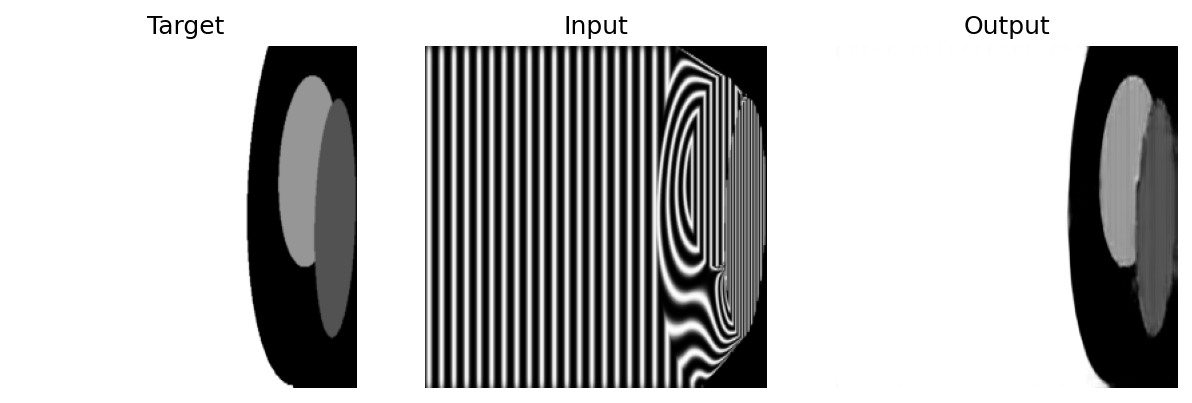

In [24]:
x, y = val_dataset[-16]

# Add a batch dimension to the input tensor
x = x.unsqueeze(0)

net.eval()
# Move the input tensor to the 'mps' device
x_mps = x.to(device)
net = net.to(device)
# Pass the input through the model and detach the output
xprime = net(x_mps).detach()

# Move the output tensor back to the CPU and convert to NumPy array
xprime_cpu = xprime.cpu().numpy()

# Remove the batch dimension for visualization
xprime_cpu = xprime_cpu.squeeze(0)
x = x.squeeze(0)
y = y.squeeze(0)

# Plot the images
fig, ax = plt.subplots(1, 3, figsize=(10, 3), dpi=150)

ax[0].imshow(y, cmap='Greys_r', vmin=0, vmax=1)
ax[0].set_title('Target')
ax[1].imshow(x.squeeze(0), cmap='Greys_r', vmin=0, vmax=1)
ax[1].set_title('Input')
ax[2].imshow(xprime_cpu.squeeze(0), cmap='Greys_r', vmin=0, vmax=1)
ax[2].set_title('Output')

for i in range(3):
    ax[i].set_axis_off()

plt.show()

In [86]:
from model_segmentation import UNet
model = UNet()
model.load_state_dict(torch.load('seg_model_2.pt'))

<All keys matched successfully>

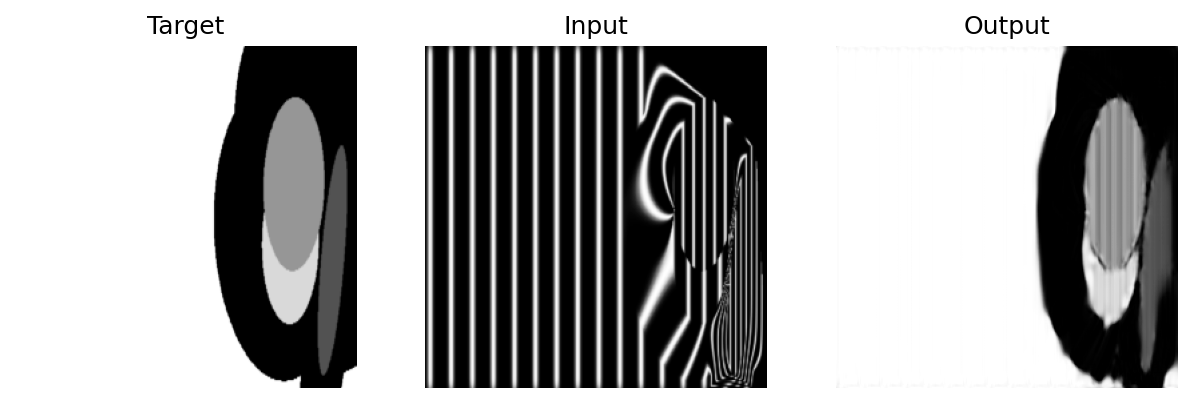

In [103]:
x, y = val_dataset[-1]
device = 'mps'  
model.to(device)
x_mps = x.unsqueeze(0).to(device)

# Now, perform the forward pass
xprime = model(x_mps).detach()
xprime_cpu = xprime.cpu().numpy()

fig,ax = plt.subplots(1,3,figsize=(10,3),dpi=150)

ax[0].imshow(y.squeeze(0),cmap='Greys_r',vmin=0,vmax=1)
ax[0].set_title('Target')
ax[1].imshow(x.squeeze(0),cmap='Greys_r',vmin=0,vmax=1)
ax[1].set_title('Input')
ax[2].imshow(xprime_cpu.squeeze(),cmap='Greys_r',vmin=0,vmax=1)
ax[2].set_title('Output')

for i in range(3):
    ax[i].set_axis_off()

plt.show()

In [26]:
def invert_image(image):
    # Invert the image
    inverted = 255 - image
    return inverted

def gamma_stretch(image, gamma=1.0,device='mps'):
    # Ensure the input image is a PyTorch tensor
    if not isinstance(image, torch.Tensor):
        image = torch.tensor(image, dtype=torch.float32)

    # Move the tensor to the specified device (GPU/MPS)
    image = image.to(device)

    # Normalize the image to the range 0 to 1
    normalized = image / 255.0

    # Apply gamma correction
    corrected = torch.pow(normalized, gamma)

    # Convert back to an image scaled to 0-255 and ensure it's on the CPU for further processing/display
    gamma_corrected = corrected * 255.0

    return gamma_corrected.cpu().numpy()

def gamma_stretch(image, gamma=1.0,device='mps'):
    # Ensure the input image is a PyTorch tensor
    if not isinstance(image, torch.Tensor):
        image = torch.tensor(image, dtype=torch.float32)

    # Move the tensor to the specified device (GPU/MPS)
    image = image.to(device)

    # Normalize the image to the range 0 to 1
    normalized = image / 255.0

    # Apply gamma correction
    corrected = torch.pow(normalized, gamma)

    # Convert back to an image scaled to 0-255 and ensure it's on the CPU for further processing/display
    gamma_corrected = corrected * 255.0

    return gamma_corrected.cpu().numpy()

def logarithmic_stretching(image, device='mps'):
    # Convert image to float32 to avoid overflow, and add a small value to avoid log(0)
    if not isinstance(image, torch.Tensor):
        image = torch.tensor(image, dtype=torch.float32)

    # Move the tensor to the GPU
    image = image.to(device)

    # Add a small value to avoid log(0) and convert image to float32 to avoid overflow
    img_float = image + 1.0

    # Apply logarithmic stretch using PyTorch operations
    log_stretch = torch.log(img_float) * (255 / torch.log(1 + torch.max(img_float)))
    return log_stretch.cpu().numpy()


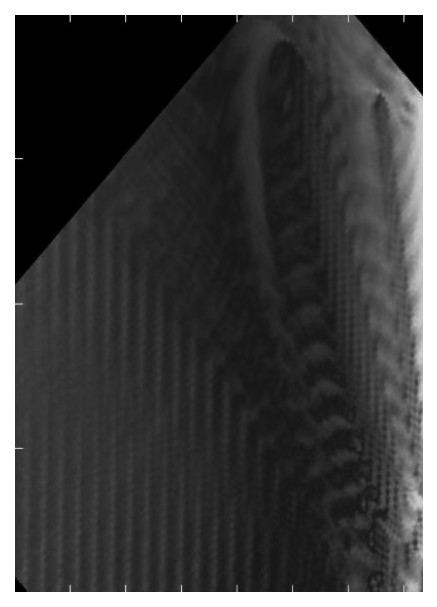

In [195]:
image1 = invert_image(gamma_stretch(np.array(Image.open('picture4.jpg').convert('L')),gamma=0.03))
fig = plt.figure(figsize=(10, 5), dpi=150)
plt.imshow(image1, cmap='gray')
fig.axes[0].set_axis_off() 


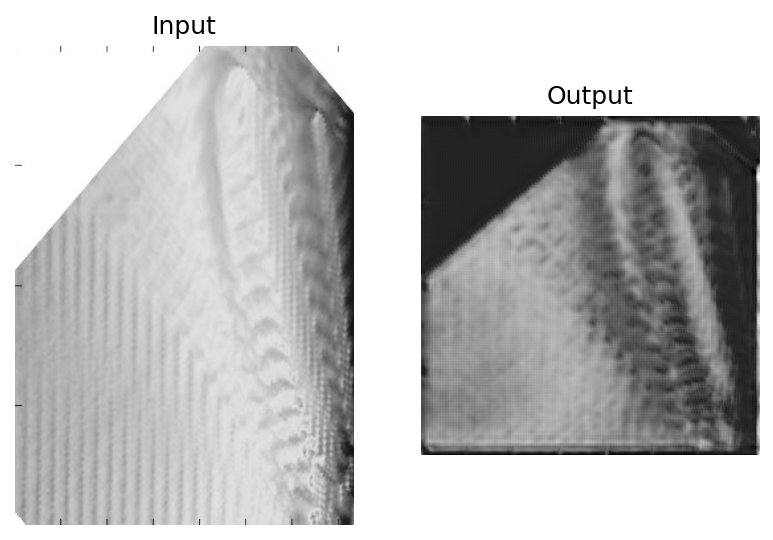

In [40]:
image1 = gamma_stretch(np.array(Image.open('picture4.jpg').convert('L')),gamma=1)

x = transform(image1).unsqueeze(0)

device = 'mps'  
net.to(device)
x_mps = x.to(device)

# Now, perform the forward pass
xprime = net(x_mps).detach()
xprime_cpu = xprime.squeeze().cpu().numpy()
pic = gamma_stretch(xprime_cpu.squeeze(),gamma=1)

fig,ax = plt.subplots(1,2,dpi=150)

ax[0].imshow(image1,cmap='Greys_r')
ax[0].set_title('Input')
# ax[1].imshow(x.squeeze(0),cmap='Greys_r',vmin=0,vmax=1)
# ax[1].set_title('Input: Noised Image')

ax[1].imshow(pic,cmap='Greys_r')
ax[1].set_title('Output')
for i in range(2):
    ax[i].set_axis_off()

plt.show()

In [117]:
# Step 1: Read the .dat file
file_path = 'data.dat'
data = np.loadtxt(file_path)

# Step 2: Plot the image
plt.imshow(data, cmap='gray')
plt.colorbar()
plt.title('Image from .dat file')
plt.show()

ValueError: could not convert string 'FieldT' to float64 at row 0, column 1.

In [11]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [199]:
import cv2
def thicken_lines(img, kernel_size=(2,2), iterations=2):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    dilated_img = cv2.dilate(img, kernel, iterations=iterations)
    return dilated_img

(32, 1, 2)


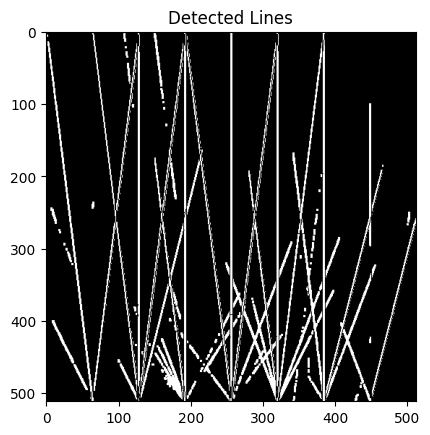

In [200]:

gray = xprime_cpu.squeeze()
gray = thicken_lines(gray)
gray = cv2.convertScaleAbs(gray)
edges = cv2.Canny(gray, 50, 100, apertureSize=7)

# linesP = cv2.HoughLinesP(gray, 1, np.pi/180, 70, minLineLength=20, maxLineGap=100)
# if linesP is not None:
#     for line in linesP:
#         x1, y1, x2, y2 = line[0]
#         cv2.line(gray, (x1, y1), (x2, y2), (0, 255, 0), 2)


# Using HoughLines method
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
print(lines.shape)

if lines is not None:
    for rho, theta in lines[:,0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(gray, (x1, y1), (x2, y2), (0, 0, 255),1)


# # Display the result
plt.imshow(gray, cmap='gray')
plt.title('Detected Lines')
plt.show()
# plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
# plt.title('Detected Lines')
# plt.show()
# thickened_image = thicken_lines(gray)
# thickened_image = cv2.convertScaleAbs(thickened_image)
# plt.imshow(thickened_image, cmap='gray')


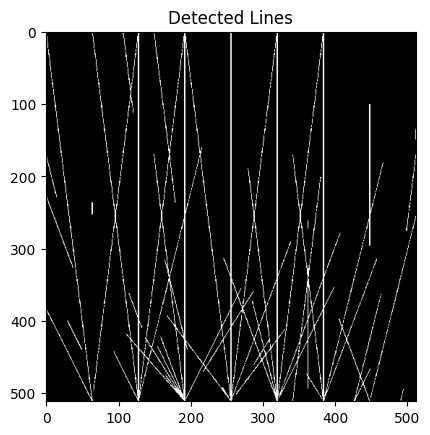

In [198]:
ygray = y.squeeze().numpy()
yggray = thicken_lines(ygray)
# yggray = cv2.convertScaleAbs(yggray)
ygray = cv2.convertScaleAbs(ygray)
yedges = cv2.Canny(ygray, 50, 100, apertureSize=3)

# linesP = cv2.HoughLinesP(gray, 1, np.pi/180, 70, minLineLength=20, maxLineGap=100)
# if linesP is not None:
#     for line in linesP:
#         x1, y1, x2, y2 = line[0]
#         cv2.line(gray, (x1, y1), (x2, y2), (0, 255, 0), 2)
# Using HoughLines method
ylines = cv2.HoughLines(yedges, 1, np.pi/180, 200)

# Step 4: Draw the Detected Lines
# Drawing lines from HoughLines
if ylines is not None:
    for rho, theta in ylines[:,0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(ygray, (x1, y1), (x2, y2), (0, 0, 255), 3)


# # Display the result
plt.imshow(ygray, cmap='gray')
plt.title('Detected Lines')
plt.show()

/var/folders/mc/5kk9c0t15xd5vf61hkd4qk000000gp/T/ipykernel_10777/3489618351.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(change_epoch_learning_rate, TL[change_epoch_learning_rate], color='blue', marker='x', s=100, edgecolor='black', zorder=5, label='Learning Rate Change (Training)')
/var/folders/mc/5kk9c0t15xd5vf61hkd4qk000000gp/T/ipykernel_10777/3489618351.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(change_epoch_learning_rate, VL[change_epoch_learning_rate], color='red', marker='x', s=100, edgecolor='black', zorder=5, label='Learning Rate Change (Validation)')


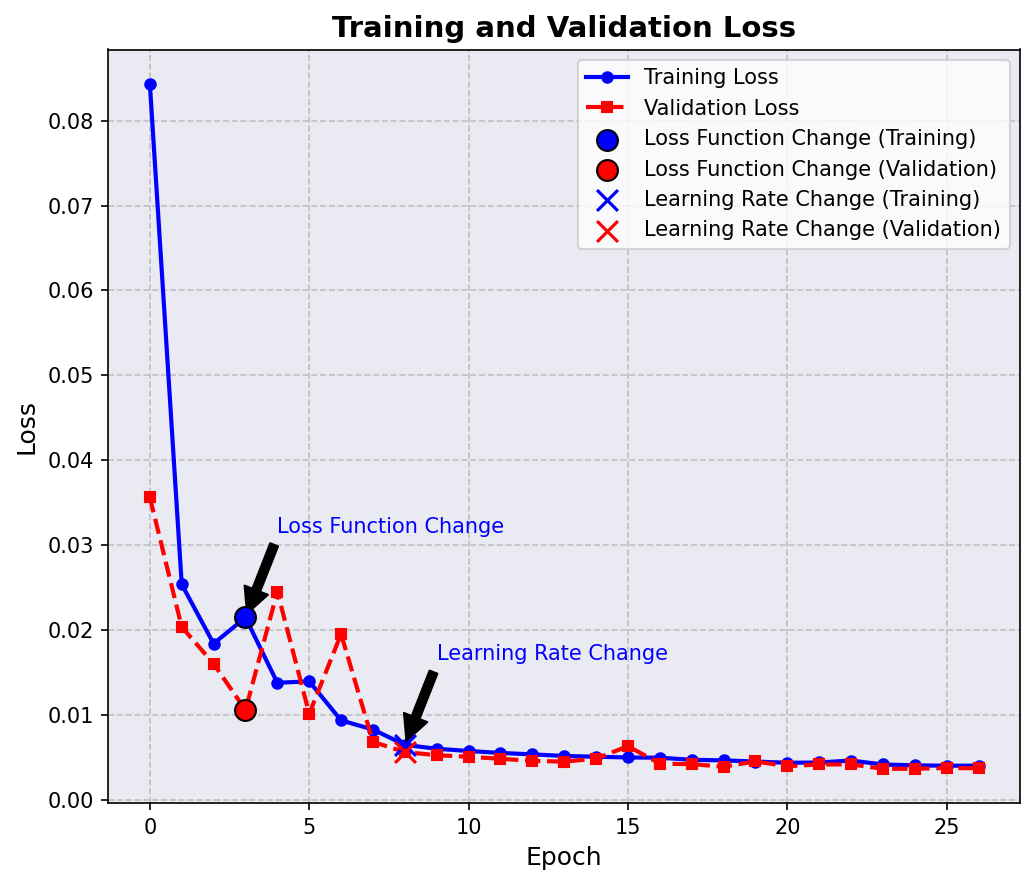

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

TL=[0.084345,0.025383,0.018405,0.021484,0.013791,0.013966,0.009365,0.008288,0.006487,0.006023,0.005764,0.005531,0.005363,0.005178,0.005084,0.005001,0.004972,0.004722,0.004655,0.004518,0.004374,0.004409,0.004637,0.004172,0.004067,0.004031,0.004031]
VL=[0.035632,0.020375,0.016037,0.010588,0.024522,0.010148,0.019537,0.006840,0.005635,0.005265,0.005084,0.004845,0.004598,0.004511,0.004855,0.006336,0.004271,0.004210,0.003916,0.004529,0.003972,0.004171,0.004184,0.003661,0.003670,0.003753,0.003730]
# Epochs where significant changes occurred
change_epoch_loss_function = 3
change_epoch_learning_rate = 8

# Plotting the training loss and validation loss
plt.figure(dpi=150, figsize=(7, 6))
ax = plt.gca()
ax.set_facecolor('#eaeaf2')  # Set background color to gray
plt.plot(TL, label='Training Loss', color='blue', linestyle='-', linewidth=2, marker='o', markersize=5)
plt.plot(VL, label='Validation Loss', color='red', linestyle='--', linewidth=2, marker='s', markersize=5)

# Highlight the point where the loss function was changed
plt.scatter(change_epoch_loss_function, TL[change_epoch_loss_function], color='blue', marker='o', s=100, edgecolor='black', zorder=5, label='Loss Function Change (Training)')
plt.scatter(change_epoch_loss_function, VL[change_epoch_loss_function], color='red', marker='o', s=100, edgecolor='black', zorder=5, label='Loss Function Change (Validation)')

# Highlight the point where the learning rate was changed
plt.scatter(change_epoch_learning_rate, TL[change_epoch_learning_rate], color='blue', marker='x', s=100, edgecolor='black', zorder=5, label='Learning Rate Change (Training)')
plt.scatter(change_epoch_learning_rate, VL[change_epoch_learning_rate], color='red', marker='x', s=100, edgecolor='black', zorder=5, label='Learning Rate Change (Validation)')

# Adding annotations
plt.annotate('Loss Function Change', xy=(change_epoch_loss_function, TL[change_epoch_loss_function]), xytext=(change_epoch_loss_function+1, TL[change_epoch_loss_function]+0.01),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10, color='blue')
plt.annotate('Learning Rate Change', xy=(change_epoch_learning_rate, TL[change_epoch_learning_rate]), xytext=(change_epoch_learning_rate+1, TL[change_epoch_learning_rate]+0.01),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10, color='blue')

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss', fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/mc/5kk9c0t15xd5vf61hkd4qk000000gp/T/ipykernel_10777/2533407781.py:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(change_epoch_learning_rate, TL[change_epoch_learning_rate], color='blue', marker='x', s=200, edgecolor='black', zorder=5, label='Learning Rate Change (Training)', alpha=0.8)
/var/folders/mc/5kk9c0t15xd5vf61hkd4qk000000gp/T/ipykernel_10777/2533407781.py:34: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(change_epoch_learning_rate, VL[change_epoch_learning_rate], color='red', marker='x', s=200, edgecolor='black', zorder=5, label='Learning Rate Change (Validation)', alpha=0.8)


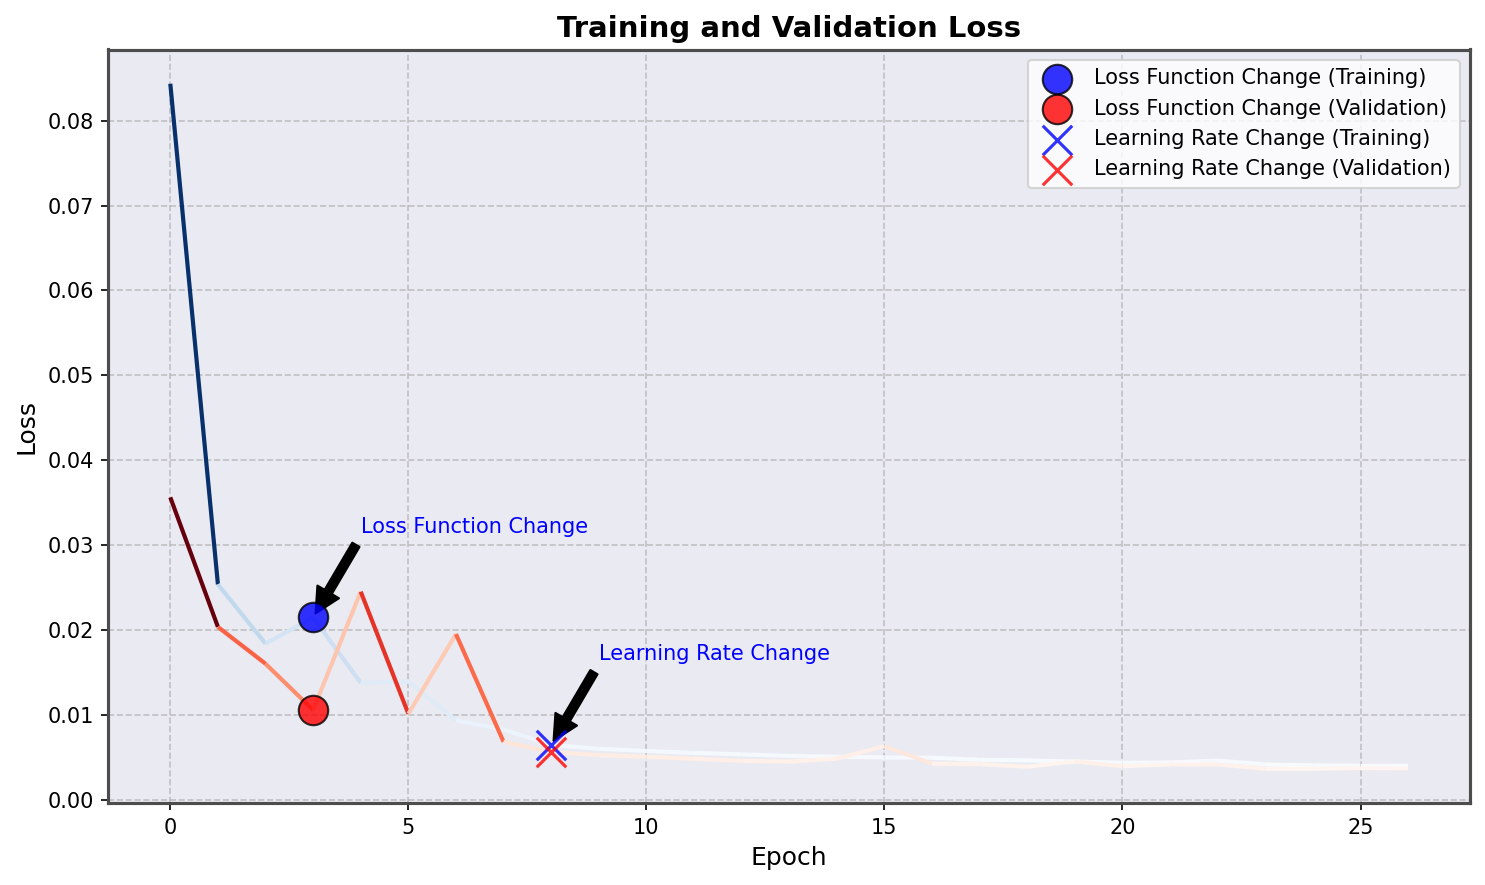

In [14]:
# Epochs where significant changes occurred
change_epoch_loss_function = 3
change_epoch_learning_rate = 8

# Function to create a gradient line
def gradient_line(x, y, cmap_name):
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    cmap = plt.get_cmap(cmap_name)
    norm = plt.Normalize(y.min(), y.max())
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(y)
    lc.set_linewidth(2)
    return lc

# Plotting the training loss and validation loss
fig, ax = plt.subplots(dpi=150, figsize=(10, 6))
ax.set_facecolor('#eaeaf2')  # Set background color to gray

# Create gradient lines
x = np.arange(len(TL))
lc_tl = gradient_line(x, np.array(TL), 'Blues')
lc_vl = gradient_line(x, np.array(VL), 'Reds')

ax.add_collection(lc_tl)
ax.add_collection(lc_vl)

# Highlight the point where the loss function was changed
plt.scatter(change_epoch_loss_function, TL[change_epoch_loss_function], color='blue', marker='o', s=200, edgecolor='black', zorder=5, label='Loss Function Change (Training)', alpha=0.8)
plt.scatter(change_epoch_loss_function, VL[change_epoch_loss_function], color='red', marker='o', s=200, edgecolor='black', zorder=5, label='Loss Function Change (Validation)', alpha=0.8)

# Highlight the point where the learning rate was changed
plt.scatter(change_epoch_learning_rate, TL[change_epoch_learning_rate], color='blue', marker='x', s=200, edgecolor='black', zorder=5, label='Learning Rate Change (Training)', alpha=0.8)
plt.scatter(change_epoch_learning_rate, VL[change_epoch_learning_rate], color='red', marker='x', s=200, edgecolor='black', zorder=5, label='Learning Rate Change (Validation)', alpha=0.8)

# Adding annotations
plt.annotate('Loss Function Change', xy=(change_epoch_loss_function, TL[change_epoch_loss_function]), xytext=(change_epoch_loss_function+1, TL[change_epoch_loss_function]+0.01),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10, color='blue')
plt.annotate('Learning Rate Change', xy=(change_epoch_learning_rate, TL[change_epoch_learning_rate]), xytext=(change_epoch_learning_rate+1, TL[change_epoch_learning_rate]+0.01),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10, color='blue')

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss', fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Adding glowing effect
for spine in ax.spines.values():
    spine.set_edgecolor('#4d4d4d')
    spine.set_linewidth(1.5)

plt.show()